## Script Boletín TIC 4T 2022
**Fecha creación:** 24/04/2023 \
**Autor:** GIT Estadisticas y Estudios Sectoriales\
**Versión:** Versión para Jupyter Notebook\
**Edito y Adapto:** Ing.Luis Miguel Castañeda Sierra

## Directorios iniciales y Lectura de Información

In [1]:
# Se importan la Librerias para interactuar con los archivos del sistema 
import sys
import os
#sys.path

In [2]:
sys.setrecursionlimit(10000) # Linea para que el script no se desborde y se generen errores

In [3]:
# Marcación directorio global

Gpath = "C:/Users/VisionTecnology/OneDrive - MINTIC/GITEES"

os.chdir(Gpath)

# Marcación carpetas secundarias
tic_path = f"{Gpath}/BoletinTIC"
T_path = f"{tic_path}/4T2022"
micro_path = f"{Gpath}/BoletinTIC/Microdato"
data_path  = f"{tic_path}/data/4T2022" #Varia según el Periodo

# Marcación librerias adicionales 
sys.path.append("C:/Users/VisionTecnology/OneDrive - MINTIC/GITEES/BoletinTIC/CodigosTIC/Librerias")


In [4]:
#lineas para comprobar que la estructura de directorios instanciadas apuntan a la estructura de directorios creadas
print("         Ruta de Acceso Global: " + Gpath)
print("  Ruta de Acceso Datos Boletin: " + tic_path)
print("Ruta de Acceso Datos Microdato: " + micro_path)

         Ruta de Acceso Global: C:/Users/VisionTecnology/OneDrive - MINTIC/GITEES
  Ruta de Acceso Datos Boletin: C:/Users/VisionTecnology/OneDrive - MINTIC/GITEES/BoletinTIC
Ruta de Acceso Datos Microdato: C:/Users/VisionTecnology/OneDrive - MINTIC/GITEES/BoletinTIC/Microdato


In [5]:
# Se importan las Librerias con las que el script trabajara

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import palettable
from base import * 

In [6]:
pd.__version__ #linea para verificar la versión de la Libreria de pandas en caso de errores

'1.3.5'

### Data Boletín TIC

In [7]:
try:
    os.mkdir(f"{T_path}/Preproc") # linea para crear la carpeta donde se alojaran los archivos preparatorios analisis
except:
    pass

In [8]:
#linea para la lectura de la data del Objeto de estudio del Boletin TIC
date = '2022 4T'
version = 'v1'
boletin_path = f"{data_path}/BoletinTIC - " + date + " " + version + ".xlsx"
#boletin_path = f"C:/Users/VisionTecnology/OneDrive - MINTIC/GITEES/BoletinTIC/data/BoletinTIC - 20211214 V5.xlsx"


### Microdato

In [9]:
#Linea para la lectura del Archivo de Microdato denominado Población

#poblacion = load_data(f"{micro_path}/poblacion-original",format='pkl')
poblacion = pd.read_excel(io = "C:/Users/VisionTecnology/OneDrive - MINTIC/GITEES/BoletinTIC/Microdato/poblacion.xlsx", sheet_name="Hoja1")

In [10]:
#type(poblacion)

In [11]:
#linea para verificar que este leyendo el archivo de población dataframe

#poblacion.groupby(['Región','Departamento']).count()
poblacion.head() 

,divipola_mun,divipola_dpto,Municipio,Departamento,Región,año,poblacion,cpital
0,5001,5,Medellín,Antioquia,Eje Cafetero,2018,2427129,1
1,5001,5,Medellín,Antioquia,Eje Cafetero,2019,2483545,1
2,5001,5,Medellín,Antioquia,Eje Cafetero,2020,2533424,1
3,5001,5,Medellín,Antioquia,Eje Cafetero,2021,2573220,1
4,5001,5,Medellín,Antioquia,Eje Cafetero,2022,2612958,1


## Procesamiento de los datos de Entrada

## Acceso Fijo a Internet

### Preprocesamiento y generación de archivos Preparatorios para las Graficas
**Nota:** para este procesamiento se hace lectura de las hojas especificas de acuerdo a la variable a analizar.

**Internet Ingresos (Hoja 5)**

In [12]:
internet_ingresos = pd.read_excel(boletin_path, sheet_name = "5")
internet_ingresos.tail()

,AÑO,TRIMESTRE,PROVEEDOR,INGRESOS
8535,2022,4,ZABUD NET S.A.S.,90431787
8536,2022,4,ZABUD TECHNOLOGIES S.A.S,148952000
8537,2022,4,ZAFIRO TELECOMUNICACIONES SAS,18455295
8538,2022,4,ZULDEMAYDA COMUNICACIONES,26415113
8539,2022,4,ZumaComunicacionesdeColombiaSA,597664653


In [13]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

internet_ingresos['Q'] = internet_ingresos['TRIMESTRE'].replace(quart)
internet_ingresos['FECHA'] = internet_ingresos["AÑO"].apply(str).str.cat(internet_ingresos["Q"], sep ="")

internet_ingresos['FECHA'] = pd.to_datetime(internet_ingresos['FECHA'], errors =  'ignore', format = '%Y%m')
internet_ingresos.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
internet_ingresos.tail()

,PROVEEDOR,INGRESOS,FECHA
8535,ZABUD NET S.A.S.,90431787,2022-12-01
8536,ZABUD TECHNOLOGIES S.A.S,148952000,2022-12-01
8537,ZAFIRO TELECOMUNICACIONES SAS,18455295,2022-12-01
8538,ZULDEMAYDA COMUNICACIONES,26415113,2022-12-01
8539,ZumaComunicacionesdeColombiaSA,597664653,2022-12-01


In [14]:
names = {'TELMEX COLOMBIA S.A.': 'Claro',
         'UNE EPM TELECOMUNICACIONES S.A.': 'UNE EPM',
         'COLOMBIA TELECOMUNICACIONES S.A. E.S.P.': 'Movistar',
         'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP': 'ETB',
         'EDATEL S.A.': 'EDATEL',
         'DIRECTV COLOMBIA LTDA': 'DirectTV',
         'AZTECA COMUNICACIONES COLOMBIA S.A.S': 'Azteca',
         'EMPRESAS MUNICIPALES DE CALI E.I.C.E E.S.P': 'EMCALI',
         'EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.': 'Telebucaramanga',
         'METROTEL S.A': 'METROTEL',
         'H V TELEVISION S.A.S.': 'hv Television',
         'TIRIAN TELECOMUNICACIONES SAS': 'TIRIAN',
         'LEGON TELECOMUNICACIONES S.A.S.': 'LEGON',
         'EMPRESA DE RECURSOS TECNOLOGICOS S.A E.S.P.': 'ERT',
         'INFRAESTRUCTURA Y SERVICIOS DE COLOMBIA SAS': 'Infraestructura y servicios de Colombia',
         'UNION FENOSA REDES DE TELECOMUNICACIONES S.A. - UFINET COLOMBIA S.A': 'FENOSA-UFINET',
         'COLUMBUS NETWORKS DE COLOMBIA LTDA': 'Columbus Networks',
         'LEVEL 3 COLOMBIA S.A.': 'Level 3',
        }

internet_ingresos["PROVEEDOR"] = internet_ingresos["PROVEEDOR"].replace(names)

In [15]:
internet_ingresos.FECHA.max()

Timestamp('2022-12-01 00:00:00')

In [16]:
save_data(internet_ingresos, f"{T_path}/Preproc/internet_ingresos", format = 'pkl')
#save_data(internet_ingresos, f"{T_path}/Preproc/internet_ingresos", format = 'csv')

**Internet (Hoja 4)**

In [17]:
internetu = pd.read_excel(boletin_path, sheet_name = "4") # Se agrega linea de codigo según archivo
internet1 = pd.read_excel(boletin_path, sheet_name = "4a")
internet2 = pd.read_excel(boletin_path, sheet_name = "4b")
internet = pd.concat([internetu, internet1, internet2], axis=0)
internet.tail()

,AÑO,TRIMESTRE,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,TECNOLOGÍA,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,No. ACCESOS FIJOS A INTERNET
671047,2022,4,BANSAT S.A.,99,VICHADA,99773,CUMARIBO,CORPORATIVO,SATELITAL,"1,7","0,42",1
671048,2022,4,BANSAT S.A.,99,VICHADA,99773,CUMARIBO,CORPORATIVO,SATELITAL,"1,8","1,6",1
671049,2022,4,DIRECTV COLOMBIA LTDA,99,VICHADA,99773,CUMARIBO,RESIDENCIAL - ESTRATO 3,OTRAS TECNOLOGÍAS INALÁMBRICAS,6,1,1
671050,2022,4,RED DE INGENIERÍA SAS - INRED,99,VICHADA,99773,CUMARIBO,CORPORATIVO,SATELITAL,9,"4,51",5
671051,2022,4,ZONALIBRE INGENIERIA S.A.S,99,VICHADA,99773,CUMARIBO,RESIDENCIAL - ESTRATO 1,FIBER TO THE HOME (FTTH),3,3,15


In [18]:
internet3 = internet

In [19]:
#path = 'C:/Users/ajbui/OneDrive/Trabajo/Mintic/Desarrollo/BoletinTIC/data/1T2022/'
#internet = pd.read_csv(path + 'Pestana4.csv',encoding_errors= 'replace', sep = ";")
#internet['AÑO'] = internet['A?O']
#internet['TECNOLOGÍA'] = internet['TECNOLOG?A']
#internet = internet.drop (['A?O','TECNOLOG?A'],axis=1) 
#internet.SEGMENTO = internet.SEGMENTO.str.strip()
#internet.TECNOLOGÍA = internet.TECNOLOGÍA.str.strip()
#internet.tail()

In [20]:
internet["ESTRATO"] = internet["SEGMENTO"].replace(regex = {"RESIDENCIAL - ": ""}).replace("CORPORATIVO","NA")

#internet["SEG"] = internet["SEGMENTO"]
#internet.loc[(internet["SEG"] != "CORPORATIVO") & (internet["SEG"] != "SIN ESTRATIFICAR"), "SEG"] = "Residencial"
#internet.loc[internet["SEG"] == "CORPORATIVO", "SEG"] = "Corporativo"
#internet.loc[internet["SEG"] == "SIN ESTRATIFICAR", "SEG"] = "Sin Estratificar"


internet.loc[internet["SEGMENTO"] != "CORPORATIVO", "SEGMENTO"] = "Residencial"
internet.loc[internet["SEGMENTO"] == "CORPORATIVO", "SEGMENTO"] = "Corporativo"
internet.tail()

,AÑO,TRIMESTRE,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,TECNOLOGÍA,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,No. ACCESOS FIJOS A INTERNET,ESTRATO
671047,2022,4,BANSAT S.A.,99,VICHADA,99773,CUMARIBO,Corporativo,SATELITAL,"1,7","0,42",1,NA
671048,2022,4,BANSAT S.A.,99,VICHADA,99773,CUMARIBO,Corporativo,SATELITAL,"1,8","1,6",1,NA
671049,2022,4,DIRECTV COLOMBIA LTDA,99,VICHADA,99773,CUMARIBO,Residencial,OTRAS TECNOLOGÍAS INALÁMBRICAS,6,1,1,ESTRATO 3
671050,2022,4,RED DE INGENIERÍA SAS - INRED,99,VICHADA,99773,CUMARIBO,Corporativo,SATELITAL,9,"4,51",5,NA
671051,2022,4,ZONALIBRE INGENIERIA S.A.S,99,VICHADA,99773,CUMARIBO,Residencial,FIBER TO THE HOME (FTTH),3,3,15,ESTRATO 1


In [21]:
internet["PROVEEDOR"] = internet["PROVEEDOR"].replace(names)

In [22]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

internet['Q'] = internet['TRIMESTRE'].replace(quart)
internet['FECHA'] = internet["AÑO"].apply(str).str.cat(internet["Q"], sep ="")

internet['FECHA'] = pd.to_datetime(internet['FECHA'], errors =  'ignore', format = '%Y%m')
internet.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
internet.tail()

,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,TECNOLOGÍA,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,No. ACCESOS FIJOS A INTERNET,ESTRATO,FECHA
671047,BANSAT S.A.,99,VICHADA,99773,CUMARIBO,Corporativo,SATELITAL,"1,7","0,42",1,NA,2022-12-01
671048,BANSAT S.A.,99,VICHADA,99773,CUMARIBO,Corporativo,SATELITAL,"1,8","1,6",1,NA,2022-12-01
671049,DirectTV,99,VICHADA,99773,CUMARIBO,Residencial,OTRAS TECNOLOGÍAS INALÁMBRICAS,6,1,1,ESTRATO 3,2022-12-01
671050,RED DE INGENIERÍA SAS - INRED,99,VICHADA,99773,CUMARIBO,Corporativo,SATELITAL,9,"4,51",5,NA,2022-12-01
671051,ZONALIBRE INGENIERIA S.A.S,99,VICHADA,99773,CUMARIBO,Residencial,FIBER TO THE HOME (FTTH),3,3,15,ESTRATO 1,2022-12-01


In [23]:
tec_names = {'CABLE'                         : 'Cable',
             'FIBER TO THE ANTENNA (FTTA)'   : 'Fiber to the antenna (FTTA)',
             'FIBER TO THE BUILDING O FIBER' : 'Fiber to the building o fiber to the basement (FTTB)', 
             'FIBER TO THE CABINET (FTTC)'   : 'Fiber to the cabinet (FTTC)',
             'FIBER TO THE HOME (FTTH)'      : 'Fiber to the home (FTTH)',  
             'FIBER TO THE NODE (FTTN)'      : 'Fiber to the node (FTTN)', 
             'FIBER TO THE PREMISES'         : 'Fiber to the premises',
             'HYBRID FIBER COAXIAL (HFC)'    : 'Hybrid Fiber Coaxial (HFC)',
             'OTRAS TECNOLOGÍAS DE FIBRA (AN': 'Otras tecnologías de fibra', 
             'OTRAS TECNOLOGÍAS FIJAS'       : 'Otras tecnologías fijas',
             'OTRAS TECNOLOGÍAS INALÁMBRICAS': 'Otras tecnologías inalámbricas', 
             'SATELITAL'                     : 'Satelital', 
             'WIFI'                          : 'WiFi', 
             'WIMAX'                         : 'WiMAX',
             'XDSL'                          : 'xDSL'
             }

internet['TECNOLOGÍA'] = internet['TECNOLOGÍA'].replace(tec_names)

In [24]:
internet.groupby(internet['ESTRATO']).count()

,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,TECNOLOGÍA,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,No. ACCESOS FIJOS A INTERNET,FECHA
ESTRATO,,,,,,,,,,,
ESTRATO 1,224572,224572,224572,224572,224572,224572,224572,224572,224572,224572,224572
ESTRATO 2,310164,310164,310164,310164,310164,310164,310164,310164,310164,310164,310164
ESTRATO 3,212113,212113,212113,212113,212113,212113,212113,212113,212113,212113,212113
ESTRATO 4,112946,112946,112946,112946,112946,112946,112946,112946,112946,112946,112946
ESTRATO 5,54228,54228,54228,54228,54228,54228,54228,54228,54228,54228,54228
ESTRATO 6,42745,42745,42745,42745,42745,42745,42745,42745,42745,42745,42745
NA,432989,432989,432989,432989,432989,432989,432989,432989,432989,432989,432989
SIN ESTRATIFICAR,17821,17821,17821,17821,17821,17821,17821,17821,17821,17821,17821
USO PROPIO INTERNO DEL OPERADO,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817


In [25]:
internet.groupby(internet['TECNOLOGÍA']).count()

,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,No. ACCESOS FIJOS A INTERNET,ESTRATO,FECHA
TECNOLOGÍA,,,,,,,,,,,
Cable,329495,329495,329495,329495,329495,329495,329495,329495,329495,329495,329495
Fiber to the antenna (FTTA),840,840,840,840,840,840,840,840,840,840,840
Fiber to the building o fiber to the basement (FTTB),10606,10606,10606,10606,10606,10606,10606,10606,10606,10606,10606
Fiber to the cabinet (FTTC),4648,4648,4648,4648,4648,4648,4648,4648,4648,4648,4648
Fiber to the home (FTTH),324259,324259,324259,324259,324259,324259,324259,324259,324259,324259,324259
Fiber to the node (FTTN),1075,1075,1075,1075,1075,1075,1075,1075,1075,1075,1075
Fiber to the premises,7324,7324,7324,7324,7324,7324,7324,7324,7324,7324,7324
Hybrid Fiber Coaxial (HFC),115049,115049,115049,115049,115049,115049,115049,115049,115049,115049,115049
NA (NO APLICA),14,14,14,14,14,14,14,14,14,14,14


In [26]:
internet = internet.drop(internet[internet['TECNOLOGÍA']=='NA (NO APLICA)'].index)

In [27]:
#internet = internet[internet["ESTRATO"] != " USO PROPIO INTERNO DEL OPERADO"]
estratoup = ['SIN ESTRATIFICAR', 'ESTRATO 1','ESTRATO 2', 'ESTRATO 3', 'ESTRATO 4', 
 'ESTRATO 5', 'ESTRATO 6', 'NA']
internet = internet[internet["ESTRATO"].isin(estratoup)]

In [28]:
dep = {'ANTIOQUIA': 'Antioquia',
       'ATLÁNTICO': 'Atlántico',
       'BOGOTÁ, D.C.': 'Bogotá D.C.',
       'CUNDINAMARCA': 'Cundinamarca',
       'BOLÍVAR': 'Bolívar',
       'BOYACÁ': 'Boyacá',
       'CALDAS': 'Caldas', 
       'CAQUETÁ': 'Caquetá', 
       'CAUCA': 'Cauca', 
       'CESAR': 'Cesar', 
       'CÓRDOBA': 'Córdoba', 
       'CHOCÓ': 'Chocó', 
       'HUILA': 'Huila', 
       'LA GUAJIRA': 'La Guajira', 
       'MAGDALENA': 'Magdalena', 
       'META': 'Meta', 
       'NARIÑO': 'Nariño',
       'NORTE DE SANTANDER': 'Norte de Santander', 
       'QUINDÍO': 'Quindío', 
       'RISARALDA': 'Risaralda', 
       'SANTANDER': 'Santander', 
       'SUCRE': 'Sucre',
       'TOLIMA': 'Tolima', 
       'VALLE DEL CAUCA': 'Valle del Cauca', 
       'ARAUCA': 'Arauca', 
       'CASANARE': 'Casanare', 
       'PUTUMAYO': 'Putumayo',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA': 'San Andrés', 
       'AMAZONAS': 'Amazonas', 
       'GUAINÍA': 'Guainía', 
       'GUAVIARE': 'Guaviare', 
       'VAUPÉS': 'Vaupés',
       'VICHADA': 'Vichada'
      }

internet['DEPARTAMENTO'] = internet['DEPARTAMENTO'].replace(dep)

In [29]:
categories = ['PROVEEDOR', 'DEPARTAMENTO', 'MUNICIPIO', 'SEGMENTO', 'TECNOLOGÍA', 'ESTRATO'] #'ID_MUNICIPIO'

internet[categories] = internet[categories].astype("category")
internet["ESTRATO"].cat.reorder_categories(['SIN ESTRATIFICAR','ESTRATO 1', 
                                            'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 4', 
                                            'ESTRATO 5', 'ESTRATO 6', 'NA'], ordered=True, inplace=True)

internet.rename(columns = {'No. ACCESOS FIJOS A INTERNET': 'SUSCRIPTORES'}, inplace=True)
#internet = internet.query("PROVEEDOR != 'RURALINK S.A.S'")
internet.info()

C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407547 entries, 0 to 671051
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   PROVEEDOR         1407547 non-null  category      
 1   COD_DEPARTAMENTO  1407547 non-null  int64         
 2   DEPARTAMENTO      1407547 non-null  category      
 3   COD_MUNICIPIO     1407547 non-null  int64         
 4   MUNICIPIO         1407547 non-null  category      
 5   SEGMENTO          1407547 non-null  category      
 6   TECNOLOGÍA        1407547 non-null  category      
 7   VELOCIDAD BAJADA  1407547 non-null  object        
 8   VELOCIDAD SUBIDA  1407547 non-null  object        
 9   SUSCRIPTORES      1407547 non-null  int64         
 10  ESTRATO           1407547 non-null  category      
 11  FECHA             1407547 non-null  datetime64[ns]
dtypes: category(6), datetime64[ns](1), int64(3), object(2)
memory usage: 86.0+ MB


In [30]:
internet.tail()

,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,TECNOLOGÍA,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,SUSCRIPTORES,ESTRATO,FECHA
671047,BANSAT S.A.,99,Vichada,99773,CUMARIBO,Corporativo,Satelital,"1,7","0,42",1,NA,2022-12-01
671048,BANSAT S.A.,99,Vichada,99773,CUMARIBO,Corporativo,Satelital,"1,8","1,6",1,NA,2022-12-01
671049,DirectTV,99,Vichada,99773,CUMARIBO,Residencial,Otras tecnologías inalámbricas,6,1,1,ESTRATO 3,2022-12-01
671050,RED DE INGENIERÍA SAS - INRED,99,Vichada,99773,CUMARIBO,Corporativo,Satelital,9,"4,51",5,NA,2022-12-01
671051,ZONALIBRE INGENIERIA S.A.S,99,Vichada,99773,CUMARIBO,Residencial,Fiber to the home (FTTH),3,3,15,ESTRATO 1,2022-12-01


In [31]:
internet.groupby("FECHA")["SUSCRIPTORES"].sum()


FECHA
2020-03-01    7167639
2020-06-01    7493245
2020-09-01    7701567
2020-12-01    7842096
2021-03-01    8132888
2021-06-01    8299417
2021-09-01    8350890
2021-12-01    8462276
2022-03-01    8563529
2022-06-01    8662694
2022-09-01    8756077
2022-12-01    8799409
Name: SUSCRIPTORES, dtype: int64

## Validación de los Indicadores
Se valida la información generada para el BoletinTIc con el archivos de Rangos de Validación.

In [2]:
#linea para realizar la lectura del archivo de rangos de validacion.
rangos = pd.read_excel(f"{data_path}/Rangos Validacion.xlsx", header=(0,1), index_col=0)
rangos.info

NameError: name 'pd' is not defined

In [33]:
internet.rename(columns = {'TECNOLOGÍA': 'TECNOLOGIA'}, inplace = True)
try:
    internet[internet["VELOCIDAD BAJADA"] - internet["VELOCIDAD SUBIDA"] < -1]
except:
    internet['VELOCIDAD BAJADA'] = internet["VELOCIDAD BAJADA"].str.replace(',','.').astype(float)
    internet['VELOCIDAD SUBIDA'] = internet["VELOCIDAD SUBIDA"].str.replace(',','.').astype(float)
    internet[internet["VELOCIDAD BAJADA"] - internet["VELOCIDAD SUBIDA"] < -1]    

In [34]:
internet = internet.set_index(["TECNOLOGIA", "SEGMENTO", "FECHA"]).join(rangos.stack(0))
internet.head()

PROVEEDOR  \
TECNOLOGIA SEGMENTO    FECHA                                             
Cable      Corporativo 2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   

                                   COD_DEPARTAMENTO DEPARTAMENTO  \
TECNOLOGIA SEGMENTO    FECHA                                       
Cable      Corporativo 2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   

                                   COD_MUNICIPIO MUNICIPIO  VELOCIDAD BAJADA  \
TECNOLOGIA SEGMENTO    FECHA                                                   
Cable      Corporativo 2020-03-01           5001  MEDELLÍN              3.00   
                       2020-03-01           5001  MEDELLÍN             10.24   
                       2020-03-01           5001  MEDELLÍN             10.24   
                       2020-03-01           5001  MEDELLÍN             20.48   
                       2020-03-01           5001  MEDELLÍN             10.00   

                                   VELOCIDAD SUBIDA  SUSCRIPTORES ESTRATO  \
TECNOLOGIA SEGMENTO    FECHA                                                
Cable      Corporativo 2020-03-01              1.02            15      NA   
                       2020-03-01              2.25            10      NA   
                       2020-03-01              5.00           648      NA   
                       2020-03-01              8.00           394      NA   
                       2020-03-01              2.00             1      NA   

                                   max       min  
TECNOLOGIA SEGMENTO    FECHA                      
Cable      Corporativo 2020-03-01  500  0.097656  
                       2020-03-01  500  0.097656  
                       2020-03-01  500  0.097656  
                       2020-03-01  500  0.097656  
                       2020-03-01  500  0.097656

In [35]:
internet["ok"] = (internet["VELOCIDAD BAJADA"] >= internet["min"]*1000/1024) & (internet["VELOCIDAD BAJADA"] <= internet["max"]*1024/1000)
internet["ok_c"] = (internet["VELOCIDAD BAJADA"] >= internet["min"]*1000) & (internet["VELOCIDAD BAJADA"]/1024 <= internet["max"]*1024/1000)

4263

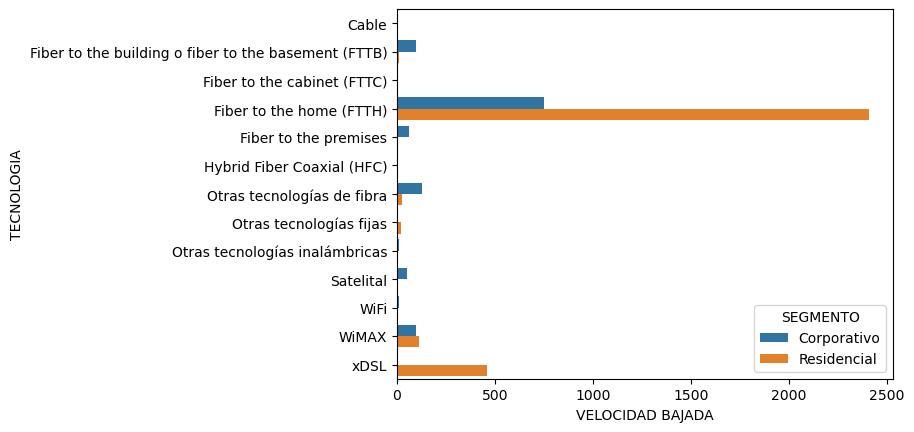

In [36]:
tmp = internet[~(internet["ok"] | internet["ok_c"])].reset_index().groupby(["TECNOLOGIA","SEGMENTO"])["VELOCIDAD BAJADA"].count()

tmp = tmp.reset_index()
sns.barplot(data = tmp, x = "VELOCIDAD BAJADA", y = "TECNOLOGIA", hue = "SEGMENTO")
len(internet[~(internet["ok"] | internet["ok_c"])])

54995

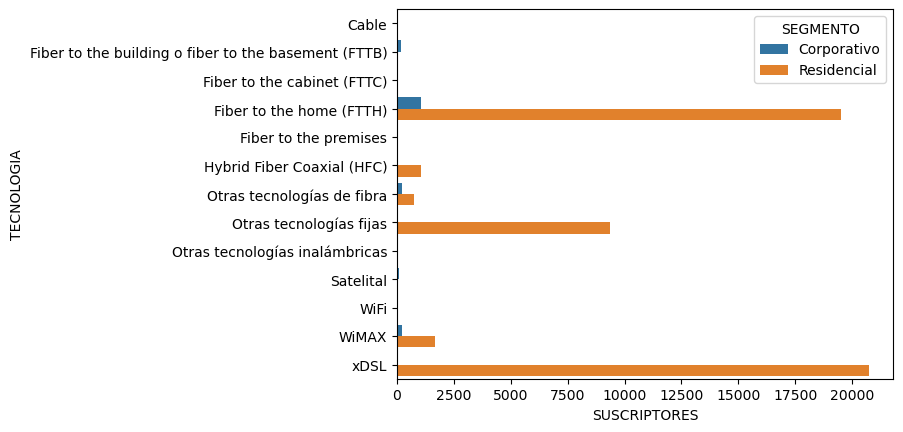

In [37]:
tmp = internet[~(internet["ok"] | internet["ok_c"])].reset_index().groupby(["TECNOLOGIA", "SEGMENTO"])["SUSCRIPTORES"].sum()
tmp = tmp.reset_index()
sns.barplot(data=tmp, x = "SUSCRIPTORES", y = "TECNOLOGIA", hue = "SEGMENTO")

internet[~(internet["ok"] | internet["ok_c"])]['SUSCRIPTORES'].sum()

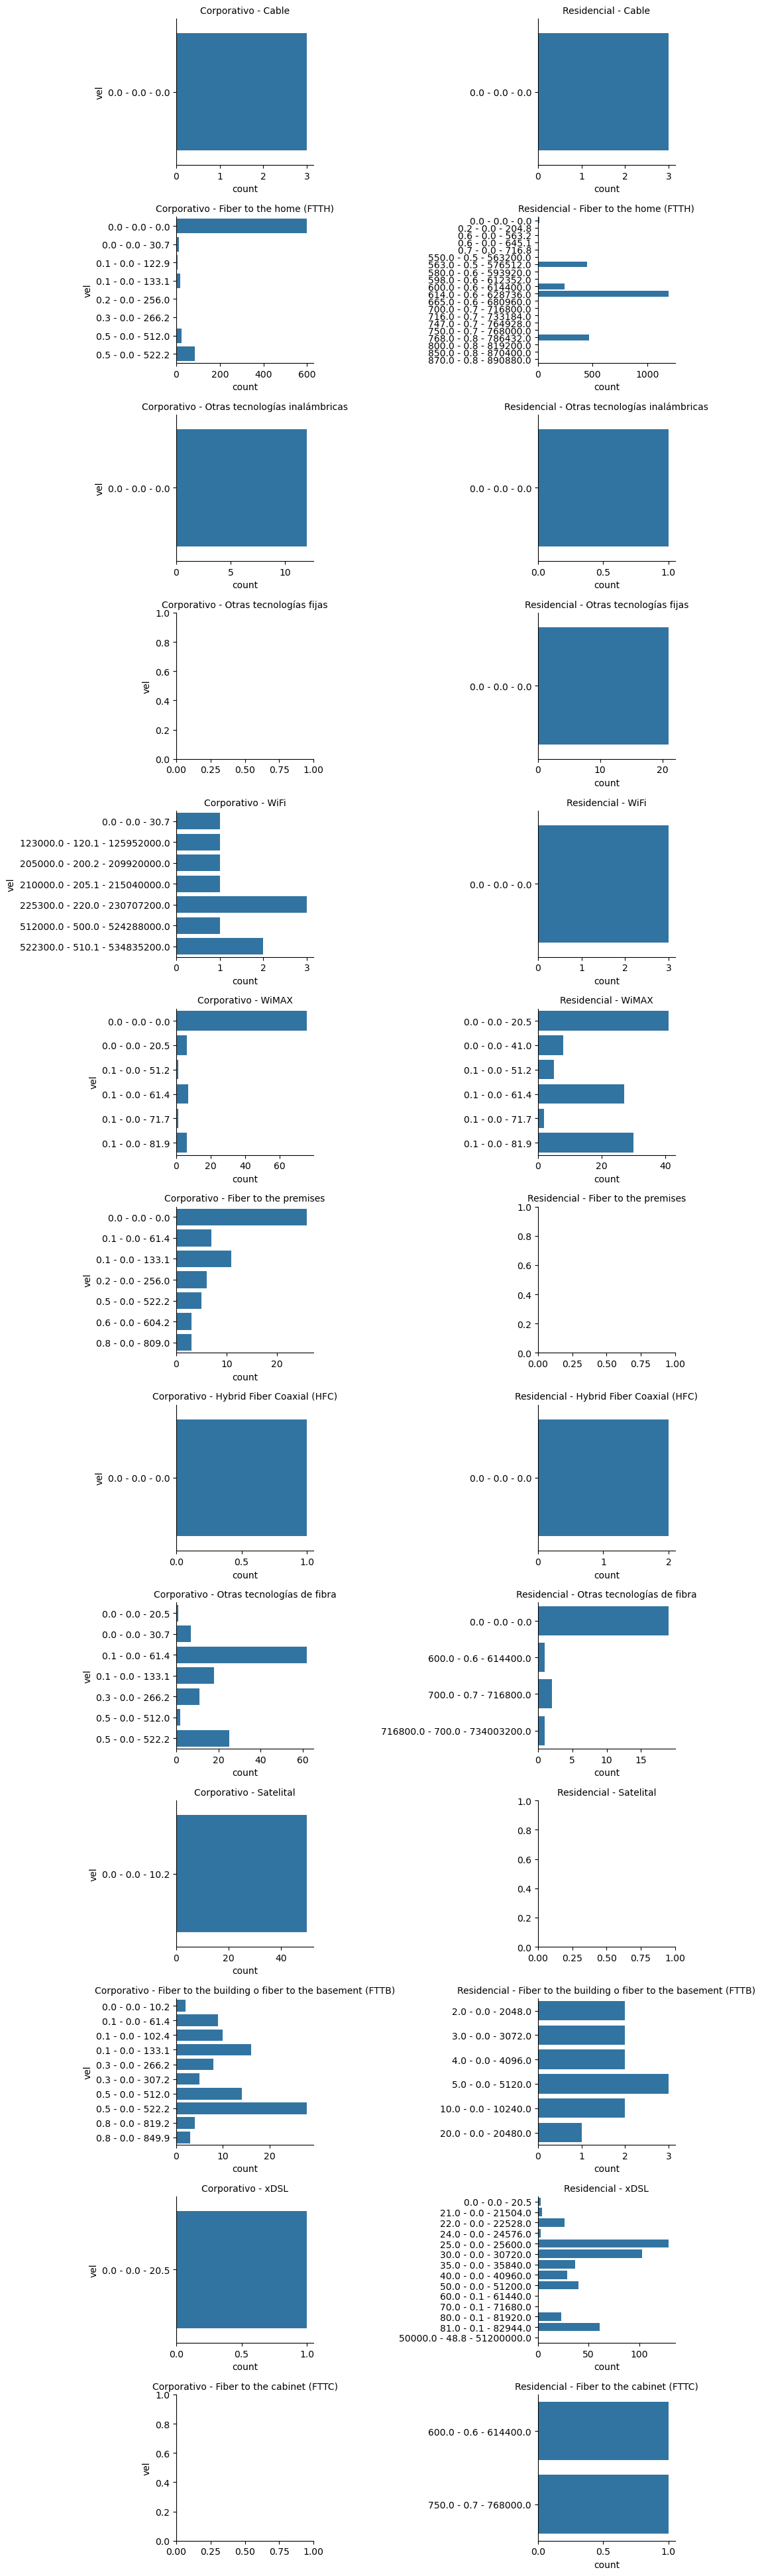

In [38]:
tmp = internet[~(internet["ok"] | internet["ok_c"])].reset_index().sort_values("VELOCIDAD BAJADA")

tmp["vel"] = tmp["VELOCIDAD BAJADA"].apply(lambda x: f"{x:0.1f} - {x/1024:0.1f} - {x*1024:0.1f}")
g = sns.FacetGrid(data=tmp, row = "TECNOLOGIA", col = "SEGMENTO",  sharex = False, sharey = False, aspect = 2)
g.map_dataframe(sns.countplot, y = "vel")
g.set_titles("{col_name} - {row_name}")

C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parame

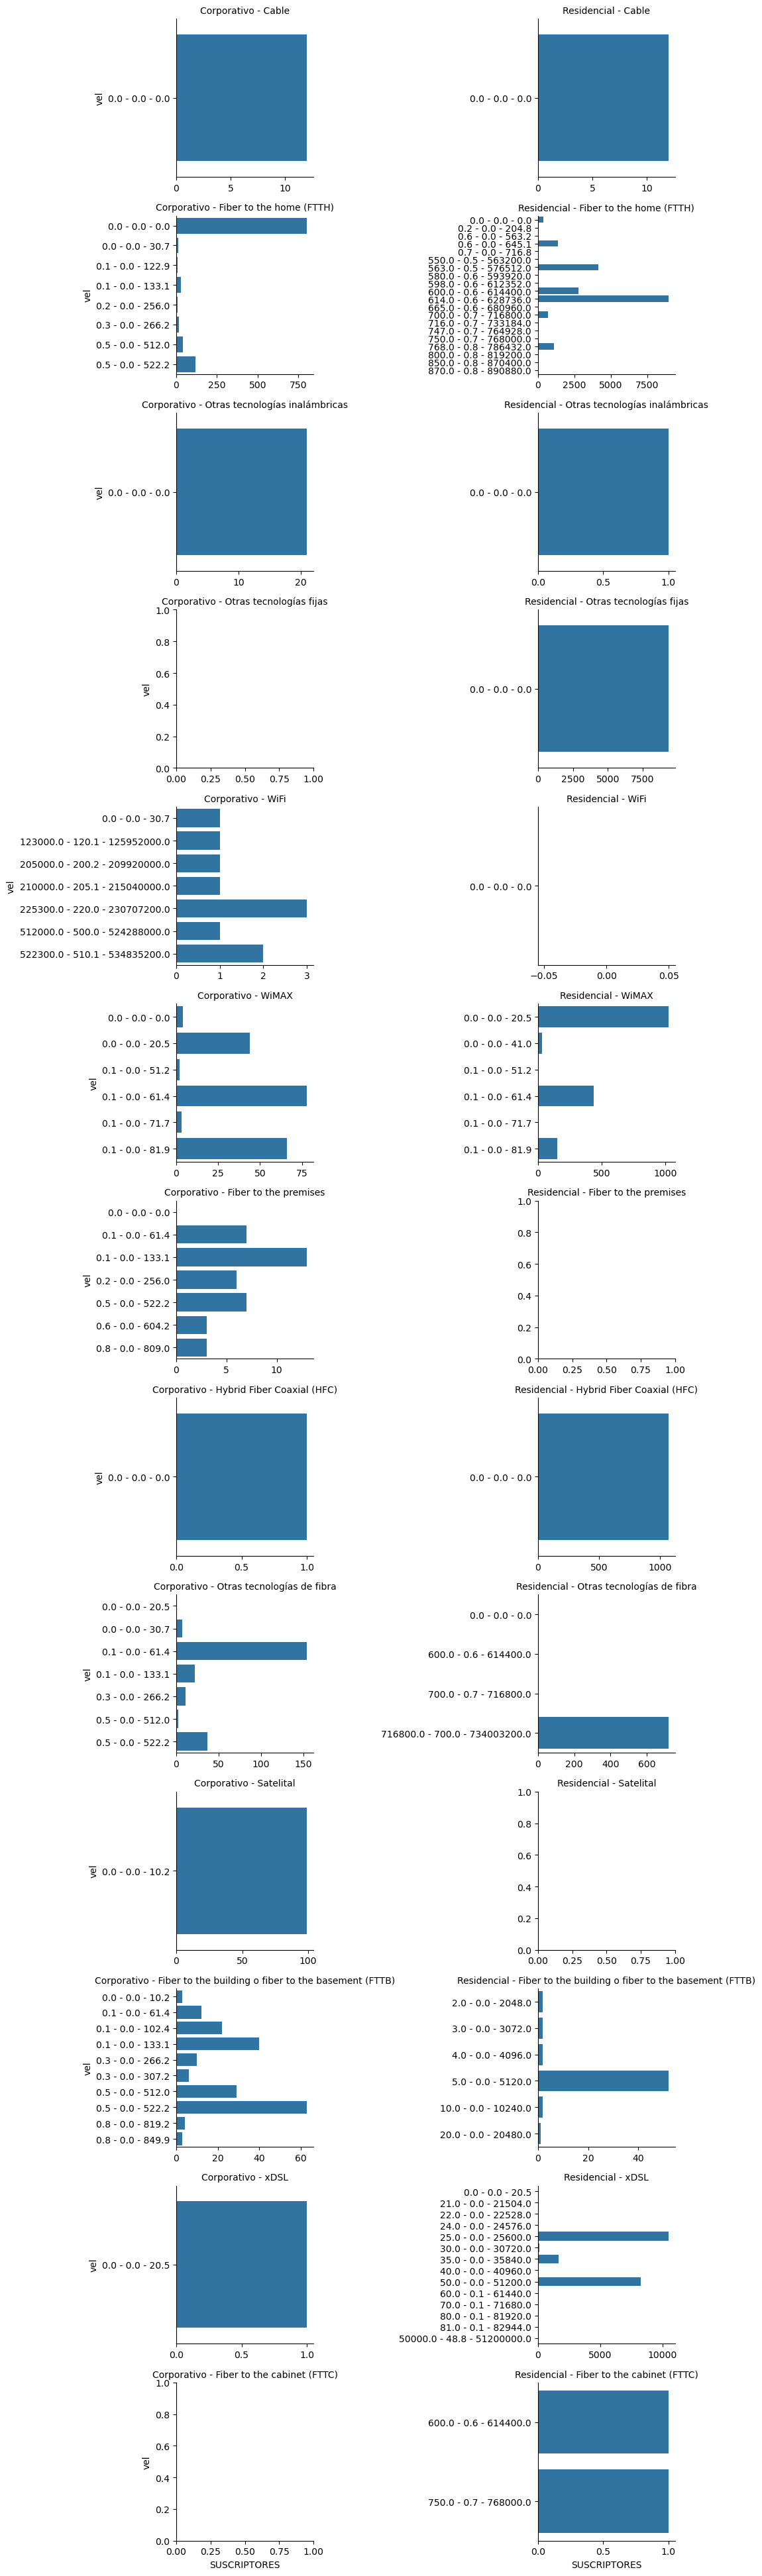

In [39]:
tmp = internet[~(internet["ok"] | internet["ok_c"])].reset_index().sort_values("VELOCIDAD BAJADA")

tmp["vel"] = tmp["VELOCIDAD BAJADA"].apply(lambda x: f"{x:0.1f} - {x/1024:0.1f} - {x*1024:0.1f}")
g = sns.FacetGrid(data = tmp, row = "TECNOLOGIA", col = "SEGMENTO", sharex = False, sharey = False, aspect = 2)
g.map_dataframe(sns.barplot, y = "vel", x = "SUSCRIPTORES", estimator = np.sum, ci = None)
g.set_titles("{col_name} - {row_name}");

In [40]:
tmp = internet.groupby(["FECHA","PROVEEDOR"])[["ok", "ok_c"]].agg([np.mean, np.sum]).dropna()
tmp = tmp.stack(1).max(axis = 1).unstack()
tmp["errores"] = ((1 - tmp["mean"])*tmp["sum"]).apply(np.ceil)
tmp[(tmp["mean"] < 0.90) & (tmp["errores"] > 1)]

mean  \
FECHA      PROVEEDOR                                                      
2020-03-01 GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.846154   
           NAVEGA COMUNICACIONES SAS                           0.882353   
           PENTAS NETWORKS SAS                                 0.111111   
2020-06-01 GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.846154   
           NAVEGA COMUNICACIONES SAS                           0.888889   
           PENTAS NETWORKS SAS                                 0.227273   
           RURALINK S.A.S                                      0.777778   
2020-09-01 CABLE CAUCA COMUNICACIONES SA                       0.875000   
           GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.888889   
           HOME TV COMUNICACIONES S.A.S.                       0.818182   
           NAVEGA COMUNICACIONES SAS                           0.894737   
           PENTAS NETWORKS SAS                                 0.320000   
           RURALINK S.A.S                                      0.866667   
2020-12-01 CABLE CAUCA COMUNICACIONES SA                       0.866667   
           GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.896552   
           PENTAS NETWORKS SAS                                 0.250000   
           RURALINK S.A.S                                      0.800000   
           SINTEL WISP S.A.S                                   0.454545   
2021-03-01 CABLE CAUCA COMUNICACIONES SA                       0.866667   
           GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.896552   
           PENTAS NETWORKS SAS                                 0.235294   
           SINTEL WISP S.A.S                                   0.500000   
2021-06-01 EMPRESAS MUNICIPALES DE CALI EICE E.S.P             0.888412   
           PENTAS NETWORKS SAS                                 0.200000   
2021-09-01 EMPRESAS MUNICIPALES DE CALI EICE E.S.P             0.877551   
           PENTAS NETWORKS SAS                                 0.142857   
2021-12-01 EMPRESAS MUNICIPALES DE CALI EICE E.S.P             0.871094   
           NETBEAM S.A.S.                                      0.818182   
           PENTAS NETWORKS SAS                                 0.720000   
2022-03-01 EMPRESAS MUNICIPALES DE CALI EICE E.S.P             0.852349   
           PENTAS NETWORKS SAS                                 0.678571   
2022-06-01 AYSATEC TELECOMUNICACIONES S.A.S.                   0.860465   
           CELSIA COLOMBIA S.A. E.S.P.                         0.886288   
           CORPORACION DE TELECOMUNICACIONES MARIALABAJA       0.714286   
           GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.769231   
           INVERSIONES Y COMUNICACIONES R.M. SAS               0.833333   
           ORIENTE TELECOMUNICACIONES DE COLOMBIA SOCIEDAD...  0.894737   
           TV AZTECA SUCURSAL COLOMBIA                         0.674699   
2022-09-01 ACTIVATE.WEB S.A.S                                  0.600000   
           CALLTOPBX S.A.S.                                    0.843750   
           CELSIA COLOMBIA S.A. E.S.P.                         0.841270   
           CORPORACION DE TELECOMUNICACIONES MARIALABAJA       0.714286   
           GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.750000   
           RED UNO S.A                                         0.666667   
           TV AZTECA SUCURSAL COLOMBIA                         0.803797   
2022-12-01 AIM CONNECT SAS                                     0.882353   
           CALLTOPBX S.A.S.                                    0.870968   
           CELSIA COLOMBIA S.A. E.S.P.                         0.819549   
           CORPORACION DE TELECOMUNICACIONES MARIALABAJA       0.666667   
           ENLACES.NET.HUILA SAS                               0.750000   
           GLOBENET CABOS SUBMARINOS COLOMBIA S.A.S.           0.720000   
           HOME TV COMUNICACIONES S.A.S.                       0.692308   
           RED UN

In [41]:
#umbral = 0.9
#umbral_n = 2

def correccion(x):
    if x.loc[x["ok"], "SUSCRIPTORES"].sum() >= x.loc[x["ok_c"], "SUSCRIPTORES"].sum():
        return 1
    else:
        return 1/1024
    
cor = internet.groupby(["FECHA","PROVEEDOR"]).apply(correccion)
cor.name = "factor"
internet = internet.join(cor, on=["FECHA", "PROVEEDOR"])
internet["VELOCIDAD"] = internet["VELOCIDAD BAJADA"]*internet["factor"]
internet.drop("factor", axis = 1, inplace = True)
err = (internet["VELOCIDAD"] < internet["min"]*1000/1024) | (internet["VELOCIDAD"] > internet["max"]*1024/1000)
good = internet[~err].groupby(['TECNOLOGIA','SEGMENTO','COD_MUNICIPIO']).agg({'VELOCIDAD':'mean'})
good.columns=['AVG']
internet = internet.join(good, on=['TECNOLOGIA','SEGMENTO','COD_MUNICIPIO'])
internet.loc[err,'VELOCIDAD'] = internet.loc[err,'AVG']
internet.head()

PROVEEDOR  \
TECNOLOGIA SEGMENTO    FECHA                                             
Cable      Corporativo 2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   
                       2020-03-01  COMUNICACION CELULAR S A COMCEL S A   

                                   COD_DEPARTAMENTO DEPARTAMENTO  \
TECNOLOGIA SEGMENTO    FECHA                                       
Cable      Corporativo 2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   
                       2020-03-01                 5    Antioquia   

                                   COD_MUNICIPIO MUNICIPIO  VELOCIDAD BAJADA  \
TECNOLOGIA SEGMENTO    FECHA                                                   
Cable      Corporativo 2020-03-01           5001  MEDELLÍN              3.00   
                       2020-03-01           5001  MEDELLÍN             10.24   
                       2020-03-01           5001  MEDELLÍN             10.24   
                       2020-03-01           5001  MEDELLÍN             20.48   
                       2020-03-01           5001  MEDELLÍN             10.00   

                                   VELOCIDAD SUBIDA  SUSCRIPTORES ESTRATO  \
TECNOLOGIA SEGMENTO    FECHA                                                
Cable      Corporativo 2020-03-01              1.02            15      NA   
                       2020-03-01              2.25            10      NA   
                       2020-03-01              5.00           648      NA   
                       2020-03-01              8.00           394      NA   
                       2020-03-01              2.00             1      NA   

                                   max       min    ok   ok_c  VELOCIDAD  \
TECNOLOGIA SEGMENTO    FECHA                                               
Cable      Corporativo 2020-03-01  500  0.097656  True  False       3.00   
                       2020-03-01  500  0.097656  True  False      10.24   
                       2020-03-01  500  0.097656  True  False      10.24   
                       2020-03-01  500  0.097656  True  False      20.48   
                       2020-03-01  500  0.097656  True  False      10.00   

                                          AVG  
TECNOLOGIA SEGMENTO    FECHA                   
Cable      Corporativo 2020-03-01  110.703821  
                       2020-03-01  110.703821  
                       2020-03-01  110.703821  
                       2020-03-01  110.703821  
                       2020-03-01  110.703821

In [42]:
internet.drop(['max', 'min', 'ok', 'ok_c','AVG'], axis=1, inplace=True)

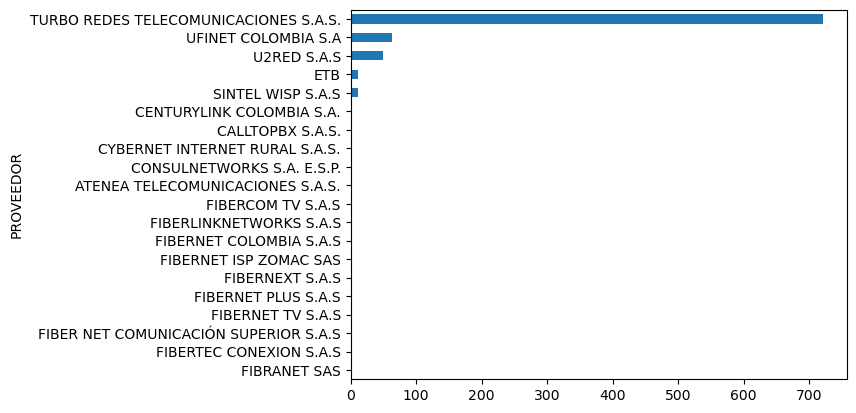

In [43]:
internet[internet["VELOCIDAD"].isna()].groupby("PROVEEDOR")["SUSCRIPTORES"].sum().sort_values().tail(20).plot(kind="barh")

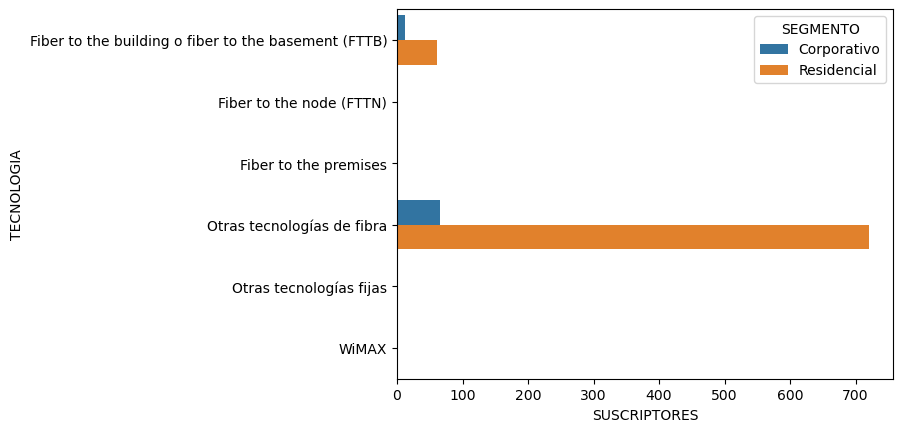

In [44]:
tmp = internet[internet["VELOCIDAD"].isna()].reset_index().groupby(["TECNOLOGIA","SEGMENTO"])["SUSCRIPTORES"].sum()
tmp = tmp.reset_index()
sns.barplot(data=tmp, x = "SUSCRIPTORES", y = "TECNOLOGIA", hue = "SEGMENTO")

C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` p

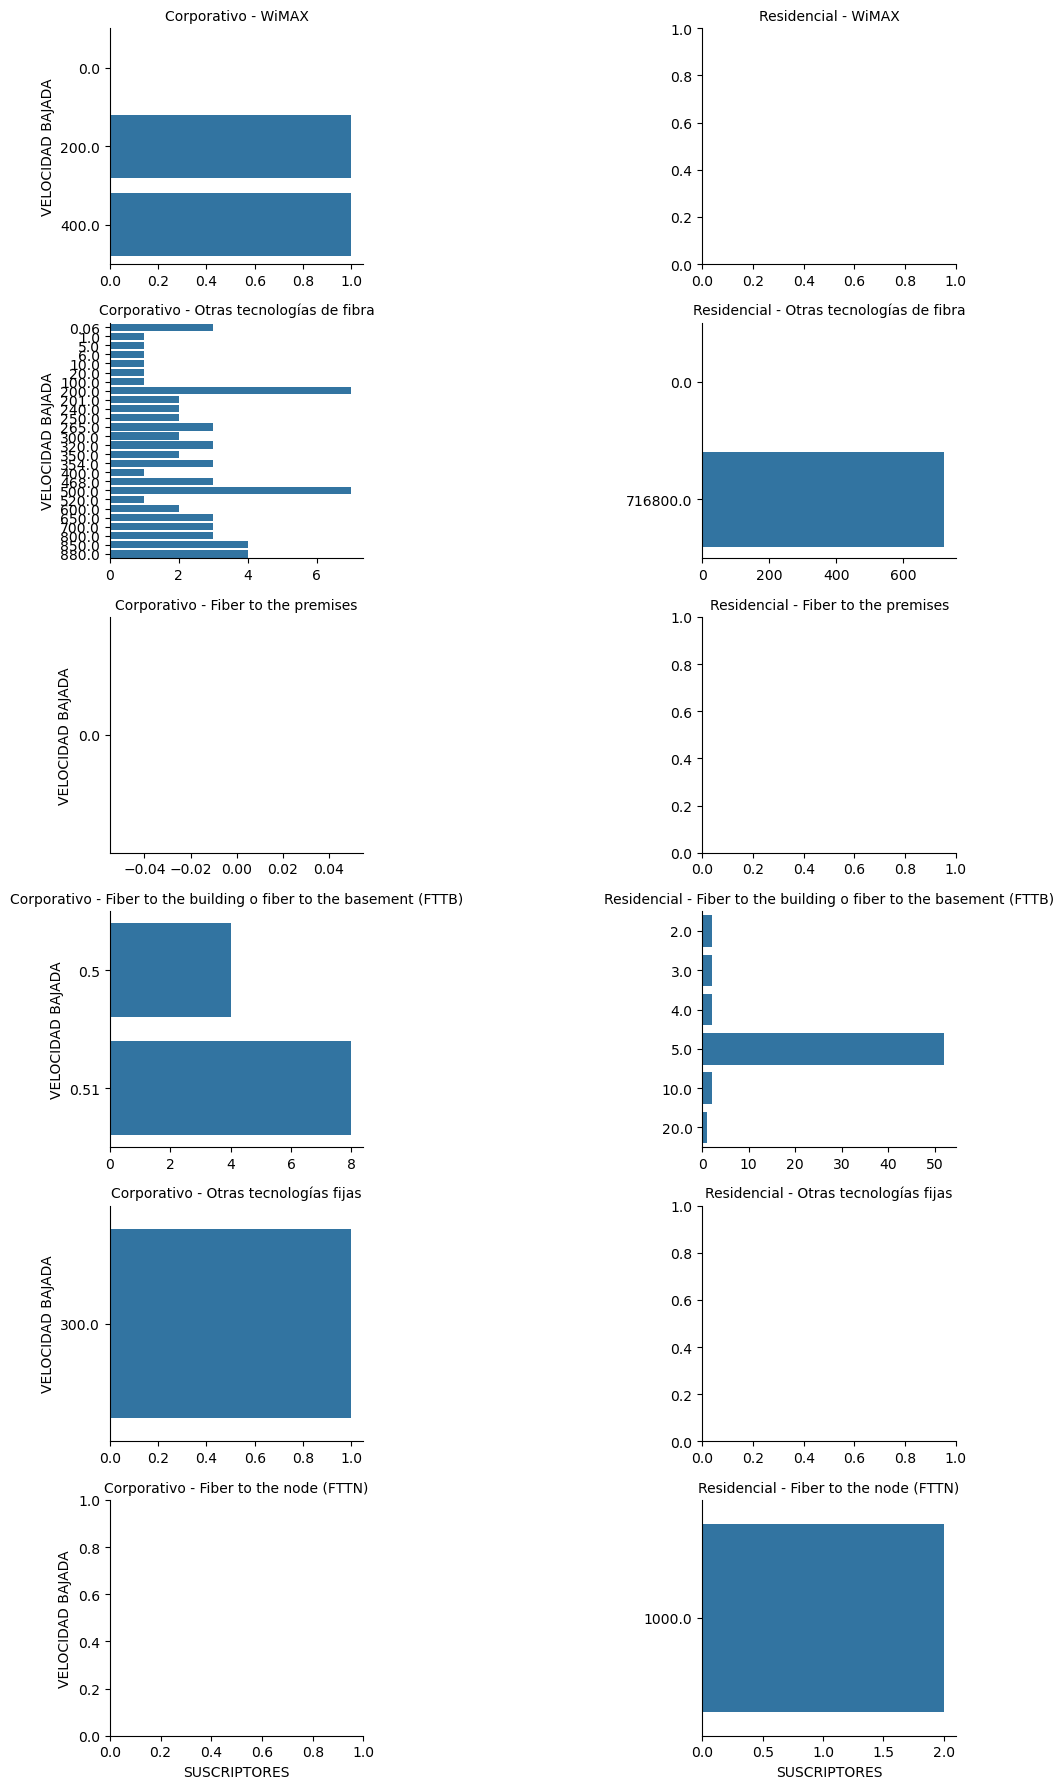

In [45]:
tmp = internet[internet["VELOCIDAD"].isna()].reset_index().sort_values("VELOCIDAD BAJADA")
g = sns.FacetGrid(data = tmp, sharex = False, sharey = False, aspect = 2., 
                  row = "TECNOLOGIA", col = "SEGMENTO")
g.map(sns.barplot, "SUSCRIPTORES", "VELOCIDAD BAJADA",
      estimator=np.sum, orient="h", ci=None)
g.set_titles("{col_name} - {row_name}")

In [46]:
internet.loc[internet["VELOCIDAD"].isna(), "SUSCRIPTORES"].sum()

865

### Imputacion de valores errones

In [47]:
internet["VELOCIDAD"] = internet.groupby(['DEPARTAMENTO', 'MUNICIPIO', 
                                          'SEGMENTO', 'TECNOLOGIA'])["VELOCIDAD"].transform(lambda x: x.fillna(x.mean()))
internet.reset_index(inplace=True)

In [48]:
internet.VELOCIDAD.isna().sum()

80

In [49]:
internet.reset_index(inplace=True)

In [50]:
internet["VELOCIDAD"] = internet.groupby(['DEPARTAMENTO', 'MUNICIPIO', 
                                          'SEGMENTO', 'ESTRATO'])["VELOCIDAD"].transform(lambda x: x.fillna(x.mean()))

In [51]:
internet.VELOCIDAD.isna().sum()

5

In [52]:
internet["VELOCIDAD"].mean(), internet["VELOCIDAD BAJADA"].mean()

(64.32502810025878, 130.92046744441086)

In [53]:
internet.index

RangeIndex(start=0, stop=1407547, step=1)

### Divipolar

In [54]:
internet.rename({"ID_MUNICIPIO": "divipola_mun"}, axis=1, inplace=True)

In [55]:
#internet.divipola_mun = internet.divipola_mun.astype(str).str.pad(5, fillchar="0")

In [56]:
internet.tail()

,index,TECNOLOGIA,SEGMENTO,FECHA,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,SUSCRIPTORES,ESTRATO,VELOCIDAD
1407542,1407542,xDSL,Residencial,2022-12-01,Movistar,91,Amazonas,91001,LETICIA,1.0,1.0,11,ESTRATO 3,1.0
1407543,1407543,xDSL,Residencial,2022-12-01,Movistar,91,Amazonas,91001,LETICIA,2.0,2.0,3,ESTRATO 2,2.0
1407544,1407544,xDSL,Residencial,2022-12-01,Movistar,91,Amazonas,91001,LETICIA,2.0,2.0,1,ESTRATO 3,2.0
1407545,1407545,xDSL,Residencial,2022-12-01,Movistar,91,Amazonas,91001,LETICIA,1.0,1.0,3,ESTRATO 4,1.0
1407546,1407546,xDSL,Residencial,2022-12-01,Movistar,91,Amazonas,91001,LETICIA,1.0,1.0,3,ESTRATO 4,1.0


In [57]:
#internet = divipola_names(f"{micro_path}/divipola_mun", internet.drop(["DEPARTAMENTO","MUNICIPIO"], axis=1))

In [58]:
internet.columns =  internet.columns.str.upper()

In [59]:
internet.ESTRATO.cat.remove_categories(["NA"], inplace=True)

C:\Users\VisionTecnology\anaconda3\envs\Pyth3716\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [60]:
ultimo_timestre = internet["FECHA"].max()

internet["TECNOLOGIA"] = (internet["TECNOLOGIA"].replace({'Cable': 'Cable',
                                                          'Fiber to the antenna (FTTA)': 'Fibra',
                                                          'Fiber to the building o fiber to the basement (FTTB)': 'Fibra',
                                                          'Fiber to the cabinet (FTTC)': 'Fibra',
                                                          'Fiber to the home (FTTH)': 'Fibra', 
                                                          'Fiber to the node (FTTN)': 'Fibra', 
                                                          'Fiber to the premises': 'Fibra',
                                                          'Hybrid Fiber Coaxial (HFC)': 'Cable',
                                                          'Otras tecnologías de fibra': 'Fibra', 
                                                          'Otras tecnologías fijas': 'Otras',
                                                          'Otras tecnologías inalámbricas': 'Otras', 
                                                          'Satelital': 'Otras', 
                                                          'WiFi': 'Otras', 
                                                          'WiMAX': 'Otras',
                                                          'xDSL': 'xDSL'}))

internet = (internet
            .query("PROVEEDOR != 'K9 TELECOMUNICACIONES S.A.S.'")
            .query("PROVEEDOR != 'LEVEL 3 COLOMBIA S.A.'"))

# internet = internet.join(load_data(f"{micro_path}/data_municipal"), on = "DIVIPOLA_MUN")

In [61]:
internet = internet[internet.SUSCRIPTORES > 0]

In [62]:
save_data(internet, f"{T_path}/Preproc/internet", format = 'pkl')
#save_data(internet, f"{T_path}/Preproc/internet", format = 'csv')

In [63]:
internet["VELOCIDAD_T"] = internet["VELOCIDAD"]*internet["SUSCRIPTORES"]

tmp = internet.query("FECHA == FECHA.max() & SEGMENTO == 'Residencial'").groupby("DEPARTAMENTO")[['VELOCIDAD_T','SUSCRIPTORES']].sum()
tmp = tmp["VELOCIDAD_T"]/tmp["SUSCRIPTORES"]
tmp

DEPARTAMENTO
Amazonas                2.399065
Antioquia             142.819636
Arauca                 20.368627
Atlántico             132.114673
Bogotá D.C.           167.711329
Bolívar               138.311224
Boyacá                 88.379393
Caldas                112.290070
Caquetá                64.021172
Casanare               63.482224
Cauca                  88.258387
Cesar                  98.716077
Chocó                   8.765950
Cundinamarca          119.365755
Córdoba                84.200375
Guainía                 2.572414
Guaviare               17.965963
Huila                  78.593765
La Guajira             63.903061
Magdalena              98.142793
Meta                  130.869178
Nariño                 89.889638
Norte de Santander    108.798269
Putumayo               13.787994
Quindío               123.738194
Risaralda             132.443721
San Andrés            149.078548
Santander             139.626522
Sucre                  82.117473
Tolima                107.9905

## Internet Movil

### Preprocesamiento

#### Abonados - Suscriptores

In [64]:
movil_dem = pd.read_excel(boletin_path, sheet_name = "6")

In [65]:
names = {'ALMACENES EXITO INVERSIONES S.A.S.': 'Móvil Éxito',
         'AVANTEL S.A.S': 'Avantel', 
         'COLOMBIA MOVIL  S.A ESP': 'TIGO',
         'COLOMBIA TELECOMUNICACIONES S.A. E.S.P.': 'Movistar',
         'COMUNICACION CELULAR S A COMCEL S A': 'Claro',
         'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP': 'ETB',
         'LOGISTICA FLASH COLOMBIA S.A.S': 'Flash Móvil',
         'SUMA MOVIL S.A.S.': 'Suma Móvil',
         'UFF MOVIL SAS': 'Uff Móvil',
         'UNE EPM TELECOMUNICACIONES S.A. E.S.P. - UNE EPM TELCO S.A.': 'UNE EPM',
         'VIRGIN MOBILE COLOMBIA S.A.S.': 'Virgin'} 

movil_dem["PROVEEDOR"] = movil_dem["PROVEEDOR"].replace(names)

In [66]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

movil_dem['Q'] = movil_dem['TRIMESTRE'].replace(quart)
movil_dem['FECHA'] = movil_dem["AÑO"].apply(str).str.cat(movil_dem["Q"], sep ="")

movil_dem['FECHA'] = pd.to_datetime(movil_dem['FECHA'], errors =  'ignore', format = '%Y%m')
movil_dem.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
movil_dem.tail()

,PROVEEDOR,SEGMENTO,TERMINAL,TECNOLOGÍA,No. ABONADOS,FECHA
607,Suma Móvil,PREPAGO,TELÉFONO MÓVIL,3G,1015,2022-12-01
608,Suma Móvil,PREPAGO,TELÉFONO MÓVIL,4G,8737,2022-12-01
609,Virgin,PREPAGO,TELÉFONO MÓVIL,2G,25112,2022-12-01
610,Virgin,PREPAGO,TELÉFONO MÓVIL,3G,78289,2022-12-01
611,Virgin,PREPAGO,TELÉFONO MÓVIL,4G,491476,2022-12-01


In [67]:
movil_dem.FECHA.max()

Timestamp('2022-12-01 00:00:00')

In [68]:
movil_sus = pd.read_excel(boletin_path, sheet_name = "10")

In [69]:
movil_sus = (movil_sus.query("PROVEEDOR != 'INTELNEXT SAS'"))

In [70]:
movil_sus.tail(60) #para verificar el filtro 

,AÑO,TRIMESTRE,PROVEEDOR,SEGMENTO,TERMINAL,TECNOLOGÍA,No. SUSCRIPTORES
556,2022,3,PARTNERS TELECOM COLOMBIA SAS,Empresas,Teléfono móvil,3G,605
557,2022,3,PARTNERS TELECOM COLOMBIA SAS,Empresas,Teléfono móvil,4G,9748
558,2022,3,PARTNERS TELECOM COLOMBIA SAS,Personas,Data Card,3G,6
559,2022,3,PARTNERS TELECOM COLOMBIA SAS,Personas,Data Card,4G,21461
560,2022,3,PARTNERS TELECOM COLOMBIA SAS,Personas,Teléfono móvil,3G,64515
561,2022,3,PARTNERS TELECOM COLOMBIA SAS,Personas,Teléfono móvil,4G,998538
562,2022,3,SETROC MOBILE GROUP SAS,Personas,Teléfono móvil,4G,0
563,2022,3,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,2G,0
564,2022,3,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,3G,0
565,2022,3,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,4G,0


In [71]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

movil_sus['Q'] = movil_sus['TRIMESTRE'].replace(quart)
movil_sus['FECHA'] = movil_sus["AÑO"].apply(str).str.cat(movil_sus["Q"], sep ="")

movil_sus['FECHA'] = pd.to_datetime(movil_sus['FECHA'], errors =  'ignore', format = '%Y%m')
movil_sus.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
movil_sus.tail()

,PROVEEDOR,SEGMENTO,TERMINAL,TECNOLOGÍA,No. SUSCRIPTORES,FECHA
611,SETROC MOBILE GROUP SAS,Personas,Teléfono móvil,4G,0,2022-12-01
612,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,2G,0,2022-12-01
613,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,3G,0,2022-12-01
614,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,4G,0,2022-12-01
615,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,CMTS (para redes con tecnologí,0,2022-12-01


In [72]:
movil_sus["PROVEEDOR"] = movil_sus["PROVEEDOR"].replace(names)

In [73]:
movil_sus.FECHA.max()

Timestamp('2022-12-01 00:00:00')

In [74]:
movil_suscriptores = pd.concat((movil_sus[['PROVEEDOR', 'TERMINAL', 'TECNOLOGÍA', 'FECHA', 'No. SUSCRIPTORES']],
                                movil_dem[['PROVEEDOR', 'TERMINAL','TECNOLOGÍA', 'FECHA', 'No. ABONADOS']]
                                .rename({'No. ABONADOS': 'No. SUSCRIPTORES'}, axis=1)),
                               axis=0, sort=False).groupby(['PROVEEDOR', 'TERMINAL', 'TECNOLOGÍA', 'FECHA']).sum().reset_index()
movil_suscriptores.tail()

,PROVEEDOR,TERMINAL,TECNOLOGÍA,FECHA,No. SUSCRIPTORES
736,Virgin,Teléfono móvil,4G,2022-03-01,0
737,Virgin,Teléfono móvil,4G,2022-06-01,0
738,Virgin,Teléfono móvil,4G,2022-09-01,0
739,Virgin,Teléfono móvil,4G,2022-12-01,0
740,Virgin,Teléfono móvil,CMTS (para redes con tecnologí,2022-12-01,0


In [75]:
save_data(movil_suscriptores, f"{T_path}/Preproc/movil_suscriptores", format = 'pkl')
save_data(movil_dem, f"{T_path}/Preproc/movil_dem", format = 'pkl')
save_data(movil_sus, f"{T_path}/Preproc/movil_sus", format = 'pkl')
save_data(movil_suscriptores, f"{T_path}/Preproc/movil_suscriptores", format = 'csv')
save_data(movil_dem, f"{T_path}/Preproc/movil_dem", format = 'csv')
save_data(movil_sus, f"{T_path}/Preproc/movil_sus", format = 'csv')

#### Ingresos

In [76]:
movil_ingr7 = pd.read_excel(boletin_path, sheet_name = "7")

In [77]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

movil_ingr7['Q'] = movil_ingr7['TRIMESTRE'].replace(quart)
movil_ingr7['FECHA'] = movil_ingr7["AÑO"].apply(str).str.cat(movil_ingr7["Q"], sep ="")

movil_ingr7['FECHA'] = pd.to_datetime(movil_ingr7['FECHA'], errors =  'ignore', format = '%Y%m')
movil_ingr7.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
movil_ingr7.tail()

,PROVEEDOR,SEGMENTO,TERMINAL,INGRESOS,FECHA
244,LOV TELECOMUNICACIONES SAS,PREPAGO,TELÉFONO MÓVIL,115775605,2022-12-01
245,PARTNERS TELECOM COLOMBIA SAS,PREPAGO,TELÉFONO MÓVIL,10883130429,2022-12-01
246,SETROC MOBILE GROUP SAS,PREPAGO,TELÉFONO MÓVIL,0,2022-12-01
247,SUMA MOVIL S.A.S.,PREPAGO,TELÉFONO MÓVIL,70290144,2022-12-01
248,VIRGIN MOBILE COLOMBIA S.A.S.,PREPAGO,TELÉFONO MÓVIL,16731688476,2022-12-01


In [78]:
movil_ingr7["PROVEEDOR"] = movil_ingr7["PROVEEDOR"].replace(names)

In [79]:
movil_ingr11 = pd.read_excel(boletin_path, sheet_name = "11")

In [80]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

movil_ingr11['Q'] = movil_ingr11['TRIMESTRE'].replace(quart)
movil_ingr11['FECHA'] = movil_ingr11["AÑO"].apply(str).str.cat(movil_ingr11["Q"], sep ="")

movil_ingr11['FECHA'] = pd.to_datetime(movil_ingr11['FECHA'], errors =  'ignore', format = '%Y%m')
movil_ingr11.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
movil_ingr11.tail()

,PROVEEDOR,SEGMENTO,TERMINAL,INGRESOS,FECHA
258,PARTNERS TELECOM COLOMBIA SAS,Empresas,Teléfono móvil,327266303,2022-12-01
259,PARTNERS TELECOM COLOMBIA SAS,Personas,Data Card,1278212607,2022-12-01
260,PARTNERS TELECOM COLOMBIA SAS,Personas,Teléfono móvil,71636318022,2022-12-01
261,SETROC MOBILE GROUP SAS,Personas,Teléfono móvil,0,2022-12-01
262,VIRGIN MOBILE COLOMBIA S.A.S.,Personas,Teléfono móvil,0,2022-12-01


In [81]:
movil_ingr11["PROVEEDOR"] = movil_ingr11["PROVEEDOR"].replace(names)

In [82]:
movil_ingresos = pd.concat((movil_ingr7[['PROVEEDOR', 'TERMINAL', 'FECHA', 'INGRESOS']],
                            movil_ingr11[['PROVEEDOR', 'TERMINAL', 'FECHA', 'INGRESOS']]),
                            axis=0, sort=False).groupby(['PROVEEDOR', 'TERMINAL', 'FECHA']).sum().reset_index()

In [83]:
save_data(movil_ingresos, f"{T_path}/Preproc/movil_ingresos", format = 'pkl')
save_data(movil_ingr7, f"{T_path}/Preproc/movil_dem_ingresos", format = 'pkl')
save_data(movil_ingr11, f"{T_path}/Preproc/movil_sus_ingresos", format = 'pkl')
save_data(movil_ingresos, f"{T_path}/Preproc/movil_ingresos", format = 'csv')
save_data(movil_ingr7, f"{T_path}/Preproc/movil_dem_ingresos", format = 'csv')
save_data(movil_ingr11, f"{T_path}/Preproc/movil_sus_ingresos", format = 'csv')

#### Tráfico

In [84]:
movil_dem_trafico = pd.read_excel(boletin_path, sheet_name = "8")

In [85]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

movil_dem_trafico['Q'] = movil_dem_trafico['TRIMESTRE'].replace(quart)
movil_dem_trafico['FECHA'] = movil_dem_trafico["AÑO"].apply(str).str.cat(movil_dem_trafico["Q"], sep ="")

movil_dem_trafico['FECHA'] = pd.to_datetime(movil_dem_trafico['FECHA'], errors =  'ignore', format = '%Y%m')
movil_dem_trafico.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
movil_dem_trafico.tail()

,PROVEEDOR,SEGMENTO,TECNOLOGÍA,TRÁFICO,FECHA
161,LOV TELECOMUNICACIONES SAS,PREPAGO,NaN,35750040,2022-12-01
162,PARTNERS TELECOM COLOMBIA SAS,PREPAGO,NaN,7420862474,2022-12-01
163,SETROC MOBILE GROUP SAS,PREPAGO,NaN,242321,2022-12-01
164,SUMA MOVIL S.A.S.,PREPAGO,NaN,38233106,2022-12-01
165,VIRGIN MOBILE COLOMBIA S.A.S.,PREPAGO,NaN,5835060189,2022-12-01


In [86]:
movil_dem_trafico["PROVEEDOR"] = movil_dem_trafico["PROVEEDOR"].replace(names)
movil_dem_trafico.drop(['TECNOLOGÍA'], axis = 1, inplace = True)

In [87]:
movil_sus_trafico = pd.read_excel(boletin_path, sheet_name = "12")

In [88]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

movil_sus_trafico['Q'] = movil_sus_trafico['TRIMESTRE'].replace(quart)
movil_sus_trafico['FECHA'] = movil_sus_trafico["AÑO"].apply(str).str.cat(movil_sus_trafico["Q"], sep ="")

movil_sus_trafico['FECHA'] = pd.to_datetime(movil_sus_trafico['FECHA'], errors =  'ignore', format = '%Y%m')
movil_sus_trafico.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
movil_sus_trafico.tail()

,PROVEEDOR,TRÁFICO,FECHA
83,COMUNICACION CELULAR S A COMCEL S A,328894467181,2022-12-01
84,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,5955122145,2022-12-01
85,PARTNERS TELECOM COLOMBIA SAS,78886402578,2022-12-01
86,SETROC MOBILE GROUP SAS,0,2022-12-01
87,VIRGIN MOBILE COLOMBIA S.A.S.,0,2022-12-01


In [89]:
movil_sus_trafico["PROVEEDOR"] = movil_sus_trafico["PROVEEDOR"].replace(names)

In [90]:
save_data(movil_dem_trafico, f"{T_path}/Preproc/movil_dem_trafico", format = 'pkl')
save_data(movil_sus_trafico, f"{T_path}/Preproc/movil_sus_trafico", format = 'pkl')
save_data(movil_dem_trafico, f"{T_path}/Preproc/movil_dem_trafico", format = 'csv')
save_data(movil_sus_trafico, f"{T_path}/Preproc/movil_sus_trafico", format = 'csv')

# Telefonía Fija

## Preprocesamiento archivos preparatorios

#### Líneas

In [91]:
tel_fija = pd.read_excel(boletin_path, sheet_name = "18")

In [92]:
tel_fija.tail()

,AÑO,TRIMESTRE,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,SEGMENTO,LÍNEAS EN SERVICIO
55796,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 6,2
55797,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 2,13
55798,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 4,12
55799,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 1,5
55800,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 5,1


In [93]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_fija['Q'] = tel_fija['TRIMESTRE'].replace(quart)
tel_fija['FECHA'] = tel_fija["AÑO"].apply(str).str.cat(tel_fija["Q"], sep ="")

tel_fija['FECHA'] = pd.to_datetime(tel_fija['FECHA'], errors =  'ignore', format = '%Y%m')
tel_fija.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_fija.tail()

,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,SEGMENTO,LÍNEAS EN SERVICIO,FECHA
55796,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 6,2,2022-12-01
55797,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 2,13,2022-12-01
55798,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 4,12,2022-12-01
55799,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 1,5,2022-12-01
55800,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99001,PUERTO CARREÑO,RESIDENCIAL - ESTRATO 5,1,2022-12-01


In [94]:
tel_fija = divipolar(micro_path, tel_fija, mun='MUNICIPIO', dep='DEPARTAMENTO')

Los siguientes municipios no se encontraron:



,_dpto,_mun
3065,laguajira,manaurebalcondelcesar
4183,sucre,sanpedrodelosmilagros
4207,sucre,sanjosedetoluviejo
4758,valledelcauca,sanpedrodelosmilagros


In [95]:
save_data(tel_fija, f"{T_path}/Preproc/tel_fija", format = 'pkl')
save_data(tel_fija, f"{T_path}/Preproc/tel_fija", format = 'csv')

#### Tráfico

In [96]:
tel_fija_discado = pd.read_excel(boletin_path, sheet_name = "19")

In [97]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_fija_discado['Q'] = tel_fija_discado['TRIMESTRE'].replace(quart)
tel_fija_discado['FECHA'] = tel_fija_discado["AÑO"].apply(str).str.cat(tel_fija_discado["Q"], sep ="")

tel_fija_discado['FECHA'] = pd.to_datetime(tel_fija_discado['FECHA'], errors =  'ignore', format = '%Y%m')
tel_fija_discado.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_fija_discado.tail()

,PROVEEDOR,TRÁFICO TELEFONÍA LOCAL,TRÁFICO TELEFONÍA LE,TRÁFICO TELEFONÍA LDN,TRÁFICO TELEFONÍA LDIS,TRÁFICO TELEFONÍA LDIE,FECHA
390,EMPRESAS MUNICIPALES DE CALI EICE E.S.P,55420933,0,0,0,0,2022-03-01
391,ERT SA ESP,1013055,0,0,0,0,2022-03-01
392,TPE COMUNICACIONES COLOMBIA SAS,243780,0,0,0,0,2022-03-01
393,UNE EPM TELECOMUNICACIONES S.A.,339764733,0,0,0,0,2022-03-01
394,UNIMOS EMPRESA MINICIPAL DE TELECOMUNICACIONES...,430818,0,0,0,0,2022-03-01


In [98]:
tel_fija_discado = (tel_fija_discado.set_index(['PROVEEDOR', 'FECHA'])
                    .stack()
                    .reset_index()
                    .rename(columns = {'level_2': 'DISCADO', 0: 'TRAFICO'}))

In [99]:
tel_fija_discado["DISCADO"].replace({'TRÁFICO TELEFONÍA LE': 'Local extendido', 
                                     'TRÁFICO TELEFONÍA LOCAL': 'Local',
                                     'TRÁFICO TELEFONÍA LDIE': 'LDI entrante',
                                     'TRÁFICO TELEFONÍA LDIS': 'LDI saliente',
                                     'TRÁFICO TELEFONÍA LDN': 'LDN'}, inplace=True)

In [100]:
save_data(tel_fija_discado,  f"{T_path}/Preproc/tel_fija_discado", format = 'pkl')
save_data(tel_fija_discado,  f"{T_path}/Preproc/tel_fija_discado", format = 'csv')

#### Ingresos

In [101]:
tel_fija_ingresos = pd.read_excel(boletin_path, sheet_name = "21")

In [102]:
tel_fija_ingresos.tail()

,AÑO,TRIMESTRE,PROVEEDOR,INGRESOS TRÁFICO LDIE,INGRESOS TRÁFICO LDIS,INGRESOS TELEFONIA FIJA
10619,2022,4,ZABUD NET S.A.S.,0,0,0
10620,2022,4,ZABUD TECHNOLOGIES S.A.S,0,0,0
10621,2022,4,ZAFIRO TELECOMUNICACIONES SAS,0,0,0
10622,2022,4,ZULDEMAYDA COMUNICACIONES,0,0,0
10623,2022,4,ZumaComunicacionesdeColombiaSA,0,0,0


In [103]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_fija_ingresos['Q'] = tel_fija_ingresos['TRIMESTRE'].replace(quart)
tel_fija_ingresos['FECHA'] = tel_fija_ingresos["AÑO"].apply(str).str.cat(tel_fija_ingresos["Q"], sep ="")

tel_fija_ingresos['FECHA'] = pd.to_datetime(tel_fija_ingresos['FECHA'], errors =  'ignore', format = '%Y%m')
tel_fija_ingresos.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_fija_ingresos.tail()

,PROVEEDOR,INGRESOS TRÁFICO LDIE,INGRESOS TRÁFICO LDIS,INGRESOS TELEFONIA FIJA,FECHA
10619,ZABUD NET S.A.S.,0,0,0,2022-12-01
10620,ZABUD TECHNOLOGIES S.A.S,0,0,0,2022-12-01
10621,ZAFIRO TELECOMUNICACIONES SAS,0,0,0,2022-12-01
10622,ZULDEMAYDA COMUNICACIONES,0,0,0,2022-12-01
10623,ZumaComunicacionesdeColombiaSA,0,0,0,2022-12-01


In [104]:
tel_fija_ingresos = (tel_fija_ingresos.set_index(['PROVEEDOR', 'FECHA'])
                    .stack()
                    .reset_index()
                    .rename(columns = {'level_2': 'DISCADO', 0: 'INGRESOS'}))

In [105]:
tel_fija_ingresos["DISCADO"].replace({'INGRESOS TELEFONIA LOCAL': 'Local',
                                      'INGRESOS TRÁFICO LDIE': 'LDI entrante',
                                      'INGRESOS TRÁFICO LDN': 'LDN',
                                      'INGRESOS TRÁFICO LDIS': 'LDI saliente',
                                      'INGRESOS TELEFONIA LE': 'Local extendido'}, inplace=True)

In [106]:
save_data(tel_fija_ingresos,  f"{T_path}/Preproc/tel_fija_ingresos", format = 'pkl')
save_data(tel_fija_ingresos,  f"{T_path}/Preproc/tel_fija_ingresos", format = 'csv')

#### Destinos

In [107]:
tel_fija_destinos = pd.read_excel(boletin_path, sheet_name = "20")
tel_fija_destinos.tail()

,AÑO,TRIMESTRE,PROVEEDOR,PAÍS DESTINO,TRÁFICO EN MINUTOS
6833,2021,4,UNE EPM TELECOMUNICACIONES S.A.,Tailandia,7
6834,2021,4,UNE EPM TELECOMUNICACIONES S.A.,Taiwán,0
6835,2021,4,UNE EPM TELECOMUNICACIONES S.A.,Uruguay,42741
6836,2021,4,UNE EPM TELECOMUNICACIONES S.A.,Venezuela,50079
6837,2021,4,UNE EPM TELECOMUNICACIONES S.A.,Yemen,1


In [108]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_fija_destinos['Q'] = tel_fija_destinos['TRIMESTRE'].replace(quart)
tel_fija_destinos['FECHA'] = tel_fija_destinos["AÑO"].apply(str).str.cat(tel_fija_destinos["Q"], sep ="")

tel_fija_destinos['FECHA'] = pd.to_datetime(tel_fija_destinos['FECHA'], errors =  'ignore', format = '%Y%m')
tel_fija_destinos.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_fija_destinos.tail()

,PROVEEDOR,PAÍS DESTINO,TRÁFICO EN MINUTOS,FECHA
6833,UNE EPM TELECOMUNICACIONES S.A.,Tailandia,7,2021-12-01
6834,UNE EPM TELECOMUNICACIONES S.A.,Taiwán,0,2021-12-01
6835,UNE EPM TELECOMUNICACIONES S.A.,Uruguay,42741,2021-12-01
6836,UNE EPM TELECOMUNICACIONES S.A.,Venezuela,50079,2021-12-01
6837,UNE EPM TELECOMUNICACIONES S.A.,Yemen,1,2021-12-01


In [109]:
tel_fija_destinos.FECHA.max()

Timestamp('2021-12-01 00:00:00')

In [110]:
save_data(tel_fija_destinos, f"{T_path}/Preproc/tel_fija_destinos", format = 'pkl')
save_data(tel_fija_destinos, f"{T_path}/Preproc/tel_fija_destinos", format = 'csv')

## Telefonía Móvil

### Preprocesamiento

#### Mensajes

In [111]:
tel_movil_sms = pd.read_excel(boletin_path, sheet_name = "13")

In [112]:
names = {'ALMACENES EXITO INVERSIONES S.A.S.': 'Móvil Éxito',
         'AVANTEL S.A.S': 'Avantel', 
         'COLOMBIA MOVIL  S.A ESP': 'TIGO',
         'COLOMBIA TELECOMUNICACIONES S.A. E.S.P.': 'Movistar',
         'COMUNICACION CELULAR S A COMCEL S A': 'Claro',
         'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP': 'ETB',
         'LOGISTICA FLASH COLOMBIA S.A.S': 'Flash Móvil',
         'SUMA MOVIL S.A.S.': 'Suma Móvil',
         'UFF MOVIL SAS': 'Uff Móvil',
         'UNE EPM TELECOMUNICACIONES S.A. E.S.P. - UNE EPM TELCO S.A.': 'UNE EPM',
         'VIRGIN MOBILE COLOMBIA S.A.S.': 'Virgin'}

tel_movil_sms["PROVEEDOR"] = tel_movil_sms["PROVEEDOR"].replace(names)

In [113]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_movil_sms['Q'] = tel_movil_sms['TRIMESTRE'].replace(quart)
tel_movil_sms['FECHA'] = tel_movil_sms["AÑO"].apply(str).str.cat(tel_movil_sms["Q"], sep ="")

tel_movil_sms['FECHA'] = pd.to_datetime(tel_movil_sms['FECHA'], errors =  'ignore', format = '%Y%m')
tel_movil_sms.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_movil_sms.tail()

,PROVEEDOR,CANTIDAD DE MENSAJES,INGRESOS POR MENSAJES,FECHA
126,LOV TELECOMUNICACIONES SAS,67278,6727849,2022-12-01
127,PARTNERS TELECOM COLOMBIA SAS,27903139,816973331,2022-12-01
128,SETROC MOBILE GROUP SAS,8622,0,2022-12-01
129,Suma Móvil,88391,233816,2022-12-01
130,Virgin,3222005,70005000,2022-12-01


In [114]:
save_data(tel_movil_sms, f"{T_path}/Preproc/tel_movil_sms", format = 'pkl')
save_data(tel_movil_sms, f"{T_path}/Preproc/tel_movil_sms", format = 'csv')

#### Abonados y Líneas

In [115]:
tel_movil = pd.read_excel(boletin_path, sheet_name = "14")
tel_movil.tail()

,AÑO,TRIMESTRE,PROVEEDOR,LINEAS EN SERVICIO,LINEAS PREPAGO,LINEAS POSPAGO,LÍNEAS ACTIVADAS,LÍNEAS RETIRADAS
132,2022,4,LOV TELECOMUNICACIONES SAS,8067,8067,0,1138,80
133,2022,4,PARTNERS TELECOM COLOMBIA SAS,3001004,1661026,1339978,1454008,1127540
134,2022,4,SETROC MOBILE GROUP SAS,16173,16173,0,0,3907
135,2022,4,SUMA MOVIL S.A.S.,27110,27110,0,5378,4796
136,2022,4,VIRGIN MOBILE COLOMBIA S.A.S.,2795676,2795676,0,123355,109541


In [116]:
tel_movil["PROVEEDOR"] = tel_movil["PROVEEDOR"].replace(names)

In [117]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_movil['Q'] = tel_movil['TRIMESTRE'].replace(quart)
tel_movil['FECHA'] = tel_movil["AÑO"].apply(str).str.cat(tel_movil["Q"], sep ="")

tel_movil['FECHA'] = pd.to_datetime(tel_movil['FECHA'], errors =  'ignore', format = '%Y%m')
tel_movil.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_movil.tail()

,PROVEEDOR,LINEAS EN SERVICIO,LINEAS PREPAGO,LINEAS POSPAGO,LÍNEAS ACTIVADAS,LÍNEAS RETIRADAS,FECHA
132,LOV TELECOMUNICACIONES SAS,8067,8067,0,1138,80,2022-12-01
133,PARTNERS TELECOM COLOMBIA SAS,3001004,1661026,1339978,1454008,1127540,2022-12-01
134,SETROC MOBILE GROUP SAS,16173,16173,0,0,3907,2022-12-01
135,Suma Móvil,27110,27110,0,5378,4796,2022-12-01
136,Virgin,2795676,2795676,0,123355,109541,2022-12-01


In [118]:
save_data(tel_movil, f"{T_path}/Preproc/tel_movil", format = 'pkl')
save_data(tel_movil, f"{T_path}/Preproc/tel_movil", format = 'csv')

In [119]:
tel_movil_abonados = (tel_movil.set_index(["PROVEEDOR", "FECHA"])[["LINEAS POSPAGO", "LINEAS PREPAGO"]]
                      .stack()
                      .rename("ABONADOS")
                      .reset_index()
                      .rename({"level_2": "PLAN"}, axis=1)
                      )

tel_movil_abonados["PLAN"] = tel_movil_abonados["PLAN"].str.replace("ABONADOS","")
tel_movil_abonados.tail()

,PROVEEDOR,FECHA,PLAN,ABONADOS
269,SETROC MOBILE GROUP SAS,2022-12-01,LINEAS PREPAGO,16173
270,Suma Móvil,2022-12-01,LINEAS POSPAGO,0
271,Suma Móvil,2022-12-01,LINEAS PREPAGO,27110
272,Virgin,2022-12-01,LINEAS POSPAGO,0
273,Virgin,2022-12-01,LINEAS PREPAGO,2795676


In [120]:
save_data(tel_movil_abonados, f"{T_path}/Preproc/tel_movil_abonados", format = 'pkl')
save_data(tel_movil_abonados, f"{T_path}/Preproc/tel_movil_abonados", format = 'csv')

In [121]:
tel_movil_lineas = (tel_movil.set_index(["PROVEEDOR", "FECHA"])[["LÍNEAS ACTIVADAS", "LÍNEAS RETIRADAS"]]
                    .stack()
                    .rename("LINEAS")
                    .reset_index()
                    .rename({"level_2": "ACCION"}, axis=1)
                    )

tel_movil_lineas["ACCION"] = tel_movil_lineas["ACCION"].str.replace("LÍNEAS", "")

In [122]:
save_data(tel_movil_lineas, f"{T_path}/Preproc/tel_movil_lineas", format = 'pkl')
save_data(tel_movil_lineas, f"{T_path}/Preproc/tel_movil_lineas", format = 'csv')

#### Consumo

In [123]:
tel_movil2 = pd.read_excel(boletin_path, sheet_name = "16")
tel_movil2.tail()

,AÑO,TRIMESTRE,PROVEEDOR,CONSUMO PREPAGO ON-NET,CONSUMO PREPAGO OFF-NET,CONSUMO POSPAGO,INGRESOS OPERACIONALES
139,2022,4,LOV TELECOMUNICACIONES SAS,1126418,12787913,0,13914331
140,2022,4,PARTNERS TELECOM COLOMBIA SAS,127868874,854021884,6870633701,7852524459
141,2022,4,SETROC MOBILE GROUP SAS,0,0,0,0
142,2022,4,SUMA MOVIL S.A.S.,8019725,18033701,0,26053426
143,2022,4,VIRGIN MOBILE COLOMBIA S.A.S.,1320933603,3771039585,0,5091973188


In [124]:
tel_movil2["PROVEEDOR"] = tel_movil2["PROVEEDOR"].replace(names)

In [125]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_movil2['Q'] = tel_movil2['TRIMESTRE'].replace(quart)
tel_movil2['FECHA'] = tel_movil2["AÑO"].apply(str).str.cat(tel_movil2["Q"], sep ="")

tel_movil2['FECHA'] = pd.to_datetime(tel_movil2['FECHA'], errors =  'ignore', format = '%Y%m')
tel_movil2.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_movil2.tail()

,PROVEEDOR,CONSUMO PREPAGO ON-NET,CONSUMO PREPAGO OFF-NET,CONSUMO POSPAGO,INGRESOS OPERACIONALES,FECHA
139,LOV TELECOMUNICACIONES SAS,1126418,12787913,0,13914331,2022-12-01
140,PARTNERS TELECOM COLOMBIA SAS,127868874,854021884,6870633701,7852524459,2022-12-01
141,SETROC MOBILE GROUP SAS,0,0,0,0,2022-12-01
142,Suma Móvil,8019725,18033701,0,26053426,2022-12-01
143,Virgin,1320933603,3771039585,0,5091973188,2022-12-01


In [126]:
save_data(tel_movil2, f"{T_path}/Preproc/tel_movil2", format = 'pkl')
save_data(tel_movil2, f"{T_path}/Preproc/tel_movil2", format = 'csv')

#### Cobertura

In [127]:
tel_movil_cobertura = pd.read_excel(boletin_path, sheet_name = "17")
tel_movil_cobertura.tail()

,AÑO,TRIMESTRE,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,CABECERA MUNICIPAL,COD CENTRO POBLADO,CENTRO POBLADO,COBERTURA 2G,COBERTURA 3G,"COBERTURA HSPA+, HSPA+DC",COBERTURA 4G,COBERTURA 5G,OTRAS
146466,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99773,CUMARIBO,NO,99773010.0,PUERTO PRÍNCIPE,S,N,N,N,N,NaN
146467,2022,4,COLOMBIA MOVIL S.A ESP,99,VICHADA,99773,CUMARIBO,NO,99773013.0,PUERTO NARIÑO,N,N,N,S,N,NaN
146468,2022,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,99,VICHADA,99773,CUMARIBO,NO,99773015.0,SANTA RITA,S,N,N,N,N,N
146469,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99773,CUMARIBO,NO,99773017.0,CHAPARRAL,S,N,N,N,N,NaN
146470,2022,4,COMUNICACION CELULAR S A COMCEL S A,99,VICHADA,99773,CUMARIBO,NO,99773020.0,EL PROGRESO,S,N,N,N,N,NaN


In [128]:
tel_movil_cobertura["PROVEEDOR"] = tel_movil_cobertura["PROVEEDOR"].replace(names)

In [129]:
# OJO: solo se toman las cabeceras municipales

tel_movil_cobertura = tel_movil_cobertura.loc[tel_movil_cobertura["CABECERA MUNICIPAL "] == "SI"].copy()
tel_movil_cobertura.drop(["CENTRO POBLADO","CABECERA MUNICIPAL "], axis=1, inplace=True)

In [130]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_movil_cobertura['Q'] = tel_movil_cobertura['TRIMESTRE'].replace(quart)
tel_movil_cobertura['FECHA'] = tel_movil_cobertura["AÑO"].apply(str).str.cat(tel_movil_cobertura["Q"], sep ="")

tel_movil_cobertura['FECHA'] = pd.to_datetime(tel_movil_cobertura['FECHA'], errors =  'ignore', format = '%Y%m')
tel_movil_cobertura.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_movil_cobertura.tail()

,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,COD CENTRO POBLADO,COBERTURA 2G,COBERTURA 3G,"COBERTURA HSPA+, HSPA+DC",COBERTURA 4G,COBERTURA 5G,OTRAS,FECHA
146442,PARTNERS TELECOM COLOMBIA SAS,99,VICHADA,99624,SANTA ROSALÍA,NaN,N,S,S,S,N,NaN,2022-12-01
146444,Movistar,99,VICHADA,99773,CUMARIBO,NaN,N,N,N,S,N,N,2022-12-01
146445,Claro,99,VICHADA,99773,CUMARIBO,NaN,S,S,S,N,N,NaN,2022-12-01
146446,TIGO,99,VICHADA,99773,CUMARIBO,NaN,S,S,S,N,N,NaN,2022-12-01
146447,PARTNERS TELECOM COLOMBIA SAS,99,VICHADA,99773,CUMARIBO,NaN,N,S,S,S,N,NaN,2022-12-01


In [131]:
tel_movil_cobertura = (tel_movil_cobertura.set_index(['PROVEEDOR', 'FECHA', 'DEPARTAMENTO', 'MUNICIPIO'])
                       .stack()
                       .reset_index()
                       .rename(columns = {'level_4': 'TECNOLOGIA', 0: 'COBERTURA'}))

In [132]:
tel_movil_cobertura["COBERTURA"] = np.where(tel_movil_cobertura["COBERTURA"] == "S", 1, 0)
tel_movil_cobertura = divipolar(micro_path, tel_movil_cobertura, "MUNICIPIO", "DEPARTAMENTO")

Los siguientes municipios no se encontraron:



,_dpto,_mun
9630,cauca,sotarapaispamba
15948,laguajira,manaurebalcondelcesar
17898,narino,cuaspudcarlosama
23046,sucre,sanpedrodelosmilagros
23166,sucre,sanjosedetoluviejo
25254,valledelcauca,sanpedrodelosmilagros


In [133]:
save_data(tel_movil_cobertura, f"{T_path}/Preproc/tel_movil_cobertura", format = 'pkl')
save_data(tel_movil_cobertura, f"{T_path}/Preproc/tel_movil_cobertura", format = 'csv')

#### Tráfico

In [134]:
tel_movil_trafico = pd.read_excel(boletin_path, sheet_name = "15")

In [135]:
tel_movil_trafico.tail()

,AÑO,TRIMESTRE,PROVEEDOR,PROVEEDOR DESTINO,TRÁFICO PREPAGO,TRÁFICO POSPAGO
2955,2022,4,VIRGIN MOBILE COLOMBIA S.A.S.,PROVEEDORES DE TELEFONÍA LOCAL,23520557,0
2956,2022,4,VIRGIN MOBILE COLOMBIA S.A.S.,RED PROPIA DE LARGA DISTANCIA,102063,0
2957,2022,4,VIRGIN MOBILE COLOMBIA S.A.S.,SETROC MOBILE GROUP S.A.S.,6482,0
2958,2022,4,VIRGIN MOBILE COLOMBIA S.A.S.,SUMA MOVIL SAS,91607,0
2959,2022,4,VIRGIN MOBILE COLOMBIA S.A.S.,VIRGIN MOBILE COLOMBIA S.A.S.,41810958,0


In [136]:
tel_movil_trafico.groupby("PROVEEDOR")["PROVEEDOR"].count()

PROVEEDOR
ALMACENES EXITO INVERSIONES S.A.S.                  152
AVANTEL S.A.S                                       280
CELLVOZ COLOMBIA SERVICIOS INTEGRALES S A E S P      42
COLOMBIA MOVIL  S.A ESP                             410
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             336
COMUNICACION CELULAR S A COMCEL S A                 504
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP    356
LOGISTICA FLASH COLOMBIA S.A.S                      151
LOV TELECOMUNICACIONES SAS                           59
MAZ COM S.A.S                                         2
PARTNERS TELECOM COLOMBIA SAS                       119
SETROC MOBILE GROUP SAS                              82
SUMA MOVIL S.A.S.                                   241
VIRGIN MOBILE COLOMBIA S.A.S.                       226
Name: PROVEEDOR, dtype: int64

In [137]:
tel_movil_trafico.groupby("PROVEEDOR DESTINO")["PROVEEDOR DESTINO"].count()

PROVEEDOR DESTINO
ALMACENES EXITO INVERSIONES S.    183
AVANTEL S.A.S.                    192
CELLVOZ COLOMBIA SERVICIOS INT     30
COLOMBIA MOVIL S.A. E.S.P.        196
COLOMBIA TELECOMUNICACIONES S.    196
COMUNICACION CELULAR S A COMCE    196
COMUNICACIONES DIME S.A. ESP       43
EMPRESA DE TELECOMUNICACIONES     193
EZTALK MOBILE S.A.S.               30
KIERO IP TELECOMUNICACIONES SA     46
LOGISTICA FLASH COLOMBIA S.A.S    148
LOV TELECOMUNICACIONES SAS         29
MEGAMOVIL                          58
OTROS PROVEEDORES DE LARGA DIS    153
OTROS PROVEEDORES DE SERVICIOS    136
PARTNERS TELECOM COLOMBIA SAS     101
PLINTRON COLOMBIA SAS              18
PROVEEDORES DE TELEFONÍA LOCAL    186
RED PROPIA DE LARGA DISTANCIA     145
SCARLET MOBILE COLOMBIA S.A.S.     76
SETROC MOBILE GROUP S.A.S.         32
SUMA MOVIL SAS                    179
TPBC                                1
UFF MOVIL S.A.S.                   80
UNE EPM TELECOMUNICACIONES S.A     87
VILACOM MOBILE S.A.S.           

In [138]:
names = {'ALMACENES EXITO INVERSIONES S.A.S.': 'Móvil Éxito',
         'AVANTEL S.A.S': 'Avantel',
         'COLOMBIA MOVIL  S.A ESP': 'TIGO',
         'COLOMBIA TELECOMUNICACIONES S.A. E.S.P.': 'Movistar',
         'COMUNICACION CELULAR S A COMCEL S A': 'Claro',
         'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP': 'ETB',
         'LOGISTICA FLASH COLOMBIA S.A.S': 'Flash Móvil',
         'SUMA MOVIL S.A.S.': 'Suma Móvil',
         'UFF MOVIL SAS': 'Uff Móvil',
         'VIRGIN MOBILE COLOMBIA S.A.S.': 'Virgin',
         'UNE EPM TELECOMUNICACIONES S.A.': "UNE EPM",
         "MERCANET": "Mercanet"}

redes = {'ALMACENES EXITO INVERSIONES S.': 'Móvil Éxito',
         'AVANTEL S.A.S.': 'Avantel',
         'COLOMBIA MOVIL S.A. E.S.P.': 'TIGO',
         'COLOMBIA TELECOMUNICACIONES S.': 'Movistar',
         'COMUNICACION CELULAR S A COMCE': 'Claro',
         'COMUNICACIONES DIME S.A. ESP': 'Dime',
         'EMPRESA DE TELECOMUNICACIONES': 'ETB',
         'OTROS PROVEEDORES DE LARGA DIS': 'Proveedores LDI',
         'OTROS PROVEEDORES DE SERVICIOS MÓVILES.': 'Otros Provedores',
         'SCARLET MOBILE COLOMBIA S.A.S.': 'Scalet Mobile',
         'SUMA MOVIL SAS': 'Suma Móvil',
         'UFF MOVIL S.A.S.': 'Uff Móvil',
         'UNE EPM TELECOMUNICACIONES S.A': 'UNE EPM',
         'VILACOM MOBILE S.A.S.': 'Vilacom',
         'VIRGIN MOBILE COLOMBIA S.A.S.': 'Virgin',
         'PROVEEDORES DE TELEFONÍA LOCAL': 'Proveedores TL y TE',
         'RED PROPIA DE LARGA DISTANCIA': 'Red propia LDI',
         'KIERO IP TELECOMUNICACIONES SA' : 'Kiero IP',
         'LOGISTICA FLASH COLOMBIA S.A.S': 'Flash Móvil'
         }

tel_movil_trafico["PROVEEDOR"] = tel_movil_trafico["PROVEEDOR"].replace(names)
tel_movil_trafico["PROVEEDOR DESTINO"] = tel_movil_trafico["PROVEEDOR DESTINO"].replace(redes)

In [139]:
tel_movil_trafico.tail()

,AÑO,TRIMESTRE,PROVEEDOR,PROVEEDOR DESTINO,TRÁFICO PREPAGO,TRÁFICO POSPAGO
2955,2022,4,Virgin,Proveedores TL y TE,23520557,0
2956,2022,4,Virgin,Red propia LDI,102063,0
2957,2022,4,Virgin,SETROC MOBILE GROUP S.A.S.,6482,0
2958,2022,4,Virgin,Suma Móvil,91607,0
2959,2022,4,Virgin,Virgin,41810958,0


In [140]:
quart = {1: '03', 2: '06', 3: '09', 4: '12'}

tel_movil_trafico['Q'] = tel_movil_trafico['TRIMESTRE'].replace(quart)
tel_movil_trafico['FECHA'] = tel_movil_trafico["AÑO"].apply(str).str.cat(tel_movil_trafico["Q"], sep ="")

tel_movil_trafico['FECHA'] = pd.to_datetime(tel_movil_trafico['FECHA'], errors =  'ignore', format = '%Y%m')
tel_movil_trafico.drop(['AÑO', 'TRIMESTRE', 'Q'], axis = 1, inplace = True)
tel_movil_trafico.tail()

,PROVEEDOR,PROVEEDOR DESTINO,TRÁFICO PREPAGO,TRÁFICO POSPAGO,FECHA
2955,Virgin,Proveedores TL y TE,23520557,0,2022-12-01
2956,Virgin,Red propia LDI,102063,0,2022-12-01
2957,Virgin,SETROC MOBILE GROUP S.A.S.,6482,0,2022-12-01
2958,Virgin,Suma Móvil,91607,0,2022-12-01
2959,Virgin,Virgin,41810958,0,2022-12-01


In [141]:
tel_movil_trafico = (tel_movil_trafico.set_index(['PROVEEDOR', 'FECHA', 'PROVEEDOR DESTINO'])
                     .stack()
                     .reset_index()
                     .rename(columns = {'level_2': 'PALNA', 0: 'TRAFICO'}))

In [142]:
save_data(tel_movil_trafico, f"{T_path}/Preproc/tel_movil_trafico", format = 'pkl')
save_data(tel_movil_trafico, f"{T_path}/Preproc/tel_movil_trafico", format = 'csv')